#Seminar01

In [ ]:
import torch

checkpoint = torch.load('/content/model_best.pth.tar',map_location=torch.device('cpu'))
best_acc = checkpoint['best_acc']
start_epoch = checkpoint['epoch']
print(best_acc,start_epoch)

73.17 180


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dat = pd.read_csv('train.csv')
print(dat.shape)
dat.describe().transpose()

(891, 12)


,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [ ]:
X_train, X_val = train_test_split(dat, test_size=0.20, random_state=0)
print(X_train.shape, X_val.shape)

In [ ]:
X_train.to_csv('train_1.csv', index=False)
X_val.to_csv('val_1.csv', index=False)

In [ ]:
for index, row in dat2.iterrows():
    print(row)

In [ ]:
dat1 = pd.read_csv('train_1.csv')
print(dat1.shape)
dat1.describe().transpose()

In [ ]:
dat2 = pd.read_csv('val_1.csv')
print(dat2.shape)
dat2.describe().transpose()

In [ ]:
from zipfile import ZipFile

with ZipFile('Seminar01.zip','w') as zip:
            zip.write('train_1.csv')
            zip.write('val_1.csv')

PY

In [ ]:
f= open("Seminar01.txt","w+")
f.write("Python 3.7.12")
f.close()

In [ ]:
!python --version

Python 3.7.12


#Seminar02

Task1: ```p(x| y=-1) ~ Exp(1), p(x| y=+1) ~ N(0,1)
          \lambda_{-} = 2, \lambda_{+} = 2
          p(y=-1) =  0.25```

In [ ]:
import math
x0=1+math.sqrt(1-2*math.log(math.sqrt(2*math.pi)/3))
x0

2.165910593024557

In [ ]:
from math import cos, exp, pi
from scipy.integrate import quad

def f1(x):
    return exp(-0.5 * x * x)

def f2(x):
    return exp(-x)

res1, err1 = quad(f1, x0, math.inf)
res2, err2 = quad(f2, 0, x0)

print("The numerical result for N(0,1) is {:f} (+-{:g})"
    .format(res1, err1))
print("The numerical result for Exp(1) is {:f} (+-{:g})"
    .format(res2, err2))

const1 = 3/math.sqrt(2*math.pi)
result = (const1*res1 + res2)/2
print('3/sqrt(2*PI) = ',const1)
print('Result: ',result)

The numerical result for N(0,1) is 0.037998 (+-2.2012e-09)
The numerical result for Exp(1) is 0.885355 (+-9.82941e-15)
3/sqrt(2*PI) =  1.1968268412042982
Result:  0.4654157689276084


Task2:

In [ ]:
from numpy import mean
from numpy import std
import pandas as pd
import numpy as np

data = pd.read_csv('task2.csv')
print(data.shape)
data.describe().transpose()

(50, 3)


,count,mean,std,min,25%,50%,75%,max
x_1,50.0,0.448679,0.943112,-1.704860,-0.013628,0.395468,1.250642,2.220427
x_2,50.0,0.885331,1.836185,-2.783404,-0.258457,0.879242,2.028090,5.439624
target,50.0,0.000000,1.010153,-1.000000,-1.000000,0.000000,1.000000,1.000000


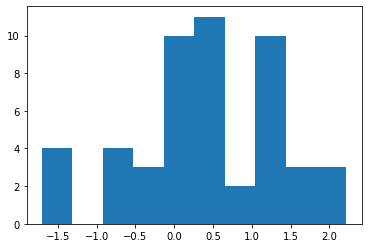

In [ ]:
from matplotlib import pyplot
pyplot.hist(data['x_1'])
pyplot.show()

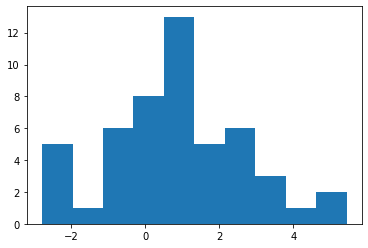

In [ ]:
from matplotlib import pyplot
pyplot.hist(data['x_2'])
pyplot.show()

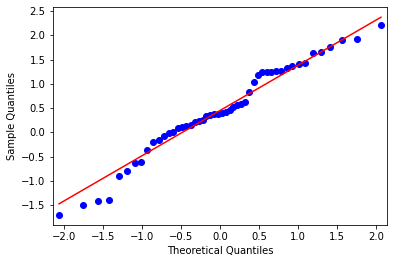

In [ ]:
from statsmodels.graphics.gofplots import qqplot
qqplot(data['x_1'], line='s')
pyplot.show()

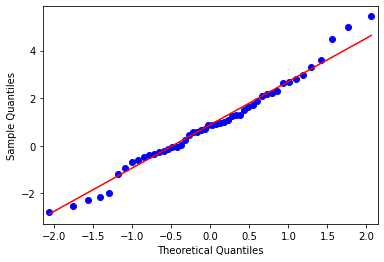

In [ ]:
from statsmodels.graphics.gofplots import qqplot
qqplot(data['x_2'], line='s')
pyplot.show()

In [ ]:
from scipy.stats import shapiro

# normality test
stat1, p1 = shapiro(data['x_1'])
stat2, p2 = shapiro(data['x_2'])
print('Statistics for x_1=%.3f, p=%.3f' % (stat1, p1))
print('Statistics for x_2=%.3f, p=%.3f' % (stat2, p2))
# interpret
alpha = 0.05
if p1 > alpha:
	print('x_1: Sample looks Gaussian (fail to reject H0)')
else:
	print('x_1: Sample does not look Gaussian (reject H0)')

if p2 > alpha:
	print('x_2: Sample looks Gaussian (fail to reject H0)')
else:
	print('x_2: Sample does not look Gaussian (reject H0)')

Statistics for x_1=0.968, p=0.196
Statistics for x_2=0.983, p=0.695
x_1: Sample looks Gaussian (fail to reject H0)
x_2: Sample looks Gaussian (fail to reject H0)


In [ ]:
from scipy.stats import normaltest
# normality test
stat1, p1 = normaltest(data['x_1'])
stat2, p2 = normaltest(data['x_2'])
print('Statistics for x_1=%.3f, p=%.3f' % (stat1, p1))
print('Statistics for x_2=%.3f, p=%.3f' % (stat2, p2))
# interpret
alpha = 0.05
if p1 > alpha:
	print('x_1: Sample looks Gaussian (fail to reject H0)')
else:
	print('x_1: Sample does not look Gaussian (reject H0)')

if p2 > alpha:
	print('x_2: Sample looks Gaussian (fail to reject H0)')
else:
	print('x_2: Sample does not look Gaussian (reject H0)')

Statistics for x_1=1.295, p=0.523
Statistics for x_2=0.888, p=0.641
x_1: Sample looks Gaussian (fail to reject H0)
x_2: Sample looks Gaussian (fail to reject H0)


In [ ]:
from scipy.stats import anderson

# normality test
result1 = anderson(data['x_1'])
result2 = anderson(data['x_2'])
print('Statistic for x_1: %.3f' % result1.statistic)
print('Statistic for x_2: %.3f' % result2.statistic)
p = 0
for i in range(len(result1.critical_values)):
	sl, cv = result1.significance_level[i], result1.critical_values[i]
	if result1.statistic < result1.critical_values[i]:
		print('%.3f: %.3f, data(x_1) looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data(x_1) does not look normal (reject H0)' % (sl, cv))

for i in range(len(result2.critical_values)):
	sl, cv = result2.significance_level[i], result2.critical_values[i]
	if result2.statistic < result2.critical_values[i]:
		print('%.3f: %.3f, data(x_2) looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data(x_2) does not look normal (reject H0)' % (sl, cv))

Statistic for x_1: 0.522
Statistic for x_2: 0.243
15.000: 0.538, data(x_1) looks normal (fail to reject H0)
10.000: 0.613, data(x_1) looks normal (fail to reject H0)
5.000: 0.736, data(x_1) looks normal (fail to reject H0)
2.500: 0.858, data(x_1) looks normal (fail to reject H0)
1.000: 1.021, data(x_1) looks normal (fail to reject H0)
15.000: 0.538, data(x_2) looks normal (fail to reject H0)
10.000: 0.613, data(x_2) looks normal (fail to reject H0)
5.000: 0.736, data(x_2) looks normal (fail to reject H0)
2.500: 0.858, data(x_2) looks normal (fail to reject H0)
1.000: 1.021, data(x_2) looks normal (fail to reject H0)


In [ ]:
def get_p_of_y_equal_to_minus_one_and_plus_one(target):
  return [len(list(filter(lambda x: (x < 0), target)))/len(target),len(list(filter(lambda x: (x >= 0), target)))
                                                                                                          /len(target)]

def get_all_mean_and_std_square(target_minus, target_plus):
  #calc mean
  mean_minus = np.sum(target_minus, axis=0)/len(target_minus) #result: mean of x_1, x_2, target
  mean_plus = np.sum(target_plus, axis=0)/len(target_plus)

  #calc std
  target_minus_transpose = target_minus.T
  for i in range(target_minus_transpose.shape[0]-1):
    target_minus_transpose[i]=(target_minus_transpose[i]-mean_minus[i])**2
  target_minus=target_minus_transpose.T
  std_square_minus = np.sum(target_minus, axis=0)/(len(target_minus)-1)

  target_plus_transpose = target_plus.T
  for i in range(target_plus_transpose.shape[0]-1):
    target_plus_transpose[i]=(target_plus_transpose[i]-mean_plus[i])**2
  target_plus=target_plus_transpose.T
  std_square_plus = np.sum(target_plus, axis=0)/(len(target_plus)-1)

  return [mean_minus[:-1],mean_plus[:-1]],[std_square_minus[:-1],std_square_plus[:-1]]



In [ ]:
import math

In [ ]:
p1, p2 = get_p_of_y_equal_to_minus_one_and_plus_one(data['target'].values)
print(p1, p2)

0.5 0.5


In [ ]:
y_minus = data.values[:25]
y_plus = data.values[25:]
m, sigma_square = get_all_mean_and_std_square(y_minus, y_plus)
print('means: ',m[0][0],m[0][1],' and ',m[1][0],m[1][1])
print('std square: ',sigma_square[0][0],sigma_square[0][1],' and ',sigma_square[1][0],sigma_square[1][1])
print('std square root ln : ',np.log(math.sqrt(sigma_square[0][0])),np.log(math.sqrt(sigma_square[0][1])),' and ',np.log(math.sqrt(sigma_square[1][0])),np.log(math.sqrt(sigma_square[1][1])))

means:  0.17993739697070765 0.9654650474585901  and  0.7174210335926431 0.8051975503768627
std square:  1.1661549489331444 2.385011087123411  and  0.4993618181610397 4.48524294354885
std square root ln :  0.0768559842036564 0.4346018865092804  and  -0.3472121797418795 0.7503963310295383


Test:

In [ ]:
def a1(x):
  if x > 2.165910593024557:
    return -1
  else:
    return 1

def R():
    return 0.4654157689276084

def a2(x):
  a = (((x[0]-0.7174210335926431)**2)/0.4993618181610397 + ((x[1]-0.8051975503768627)**2)/4.48524294354885 - ((x[0]-0.17993739697070765)**2)/1.1661549489331444 - ((x[1]-0.9654650474585901)**2)/2.385011087123411)/2 - 0.3472121797418795 + 0.7503963310295383 - 0.0768559842036564 - 0.4346018865092804 + 0.5 - 0.5

  if a >= 0:
    return -1
  else:
    return 1

if __name__ == '__main__':
    #print(a1(0.0), R(), a2([0.0, 0.0]))

    #with open('seminar02_task1.txt', 'w') as f:
    #    for i in range(-50, 50):
    #        x = i/10.0
    #        y = a1(x)
    #        f.write('%d ' % y)

    with open('seminar02_task2.txt', 'w') as f:
        f.write('%.3f' % R())

    #with open('seminar02_task3.txt', 'w') as f:
    #    for i in range(-50, 50):
    #        x1 = i/10.0
    #        for j in range(-50, 50):
    #            x2 = j/10.0
    #            y = a2([x1, x2])
    #            f.write('%d ' % y)

PY

In [ ]:
import pandas as pd

data = pd.read_csv('141.csv')
data

,TIMESTAMP,TRACK_ID,OBJECT_TYPE,X,Y,CITY_NAME
0,3.159706e+08,00000000-0000-0000-0000-000000000000,AV,2035.259026,613.545320,PIT
1,3.159706e+08,00000000-0000-0000-0000-000000048385,AGENT,2019.715108,598.241646,PIT
2,3.159706e+08,00000000-0000-0000-0000-000000048413,OTHERS,2113.853378,665.980179,PIT
3,3.159706e+08,00000000-0000-0000-0000-000000048472,OTHERS,1984.546218,596.720095,PIT
4,3.159706e+08,00000000-0000-0000-0000-000000048494,OTHERS,1994.977551,572.273010,PIT
...,...,...,...,...,...,...
568,3.159706e+08,00000000-0000-0000-0000-000000048576,OTHERS,1955.217654,645.513414,PIT
569,3.159706e+08,00000000-0000-0000-0000-000000048472,OTHERS,1984.798449,595.669230,PIT
570,3.159706e+08,00000000-0000-0000-0000-000000048569,OTHERS,1974.184871,623.602903,PIT
571,3.159706e+08,00000000-0000-0000-0000-000000048577,OTHERS,1970.431441,627.548520,PIT


In [ ]:
objects_in_the_script = set(data['TRACK_ID'])
len(objects_in_the_script)

33

In [ ]:
def distance_eu(p,q):
  return math.sqrt((q[0]-p[0])**2 + (q[1]-p[1])**2)

In [ ]:
import math

longest_trajectory={'length': -1, 'track': 'noname'}

for track in objects_in_the_script:
  track_trajectory = 0
  track_coord = data.loc[data['TRACK_ID']==track]

  pre = [0,0] #x y
  cur = [0,0]
  skip_first_iter = True
  for index, row in track_coord.iterrows():
    pre = cur.copy()
    cur[0]=row['X']
    cur[1]=row['Y']

    if skip_first_iter:
      skip_first_iter = False
      continue

    dist = distance_eu(pre, cur)
    track_trajectory = track_trajectory + dist

  #print(track,track_trajectory, longest_trajectory['length'])
  if track_trajectory > longest_trajectory['length']:
     longest_trajectory['track']=track
     longest_trajectory['length']=round(track_trajectory,2)
     print(longest_trajectory)

{'length': 0.47, 'track': '00000000-0000-0000-0000-000000048547'}
{'length': 2.23, 'track': '00000000-0000-0000-0000-000000048551'}
{'length': 8.17, 'track': '00000000-0000-0000-0000-000000048549'}
{'length': 16.56, 'track': '00000000-0000-0000-0000-000000048559'}
{'length': 19.16, 'track': '00000000-0000-0000-0000-000000048472'}
{'length': 26.25, 'track': '00000000-0000-0000-0000-000000048525'}
{'length': 92.5, 'track': '00000000-0000-0000-0000-000000048385'}


#Seminar03

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [ ]:
with np.load('mnist.npz', allow_pickle=True) as f:
    train_x, train_y = f['x_train'], f['y_train']
    test_x, test_y = f['x_test'], f['y_test']
print('train ',train_x.shape, train_y.shape)
print('test ',test_x.shape, test_y.shape)

train  (60000, 28, 28) (60000,)
test  (10000, 28, 28) (10000,)


label is 4


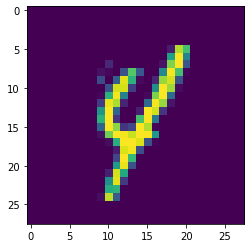

In [ ]:
index = 3457
print('label is %d' % train_y[index])
plt.imshow(train_x[index])
plt.show()

In [ ]:
np.min(train_x[index]), np.max(train_x[index]), np.mean(train_x[index])

(0, 255, 19.855867346938776)

In [ ]:
train_x_1 = train_x.reshape(len(train_x), -1)
print(train_x_1.shape)

test_x_1 = test_x.reshape(len(test_x), -1)
print(test_x_1.shape)

(60000, 784)
(10000, 784)


In [ ]:
class DummyClassifier(object):
    def __init__(self):
        self.name = 'Dummy'
    def fit(self, train_x, train_y):
        pass
    def predict(self, test_x):
        return np.random.randint(low=0, high=10, size=len(test_x))

In [ ]:
classifier = DummyClassifier()
classifier.fit(train_x_1, train_y)
pred = classifier.predict(test_x_1)

In [ ]:
def accuracy(pred, gt):
    return np.sum(pred == gt)/len(gt)

In [ ]:
acc = accuracy(pred, test_y)
print(acc)

0.0992


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(pred, test_y)

0.0992

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
results = []
for k in range(1,10, 2):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(train_x_1[:2000], train_y[:2000])
    pred = classifier.predict(test_x_1[:100])
    acc = accuracy_score(pred, test_y[:100])
    results.append(acc)
    print(k, acc)

1 0.86
3 0.9
5 0.9
7 0.89
9 0.9


In [ ]:
results = []
for k in range(1,10, 2):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(train_x_1[:3000], train_y[:3000])
    pred = classifier.predict(test_x_1[:100])
    acc = accuracy_score(pred, test_y[:100])
    results.append(acc)
    print(k, acc)

1 0.89
3 0.94
5 0.93
7 0.9
9 0.9


In [ ]:
results = []
for k in range(1,10, 2):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(train_x_1[:10000], train_y[:10000])
    pred = classifier.predict(test_x_1[:100])
    acc = accuracy_score(pred, test_y[:100])
    results.append(acc)
    print(k, acc)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
km = KMeans(n_clusters=10)
km.fit(train_x_1[:10000])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
for cluster in km.cluster_centers_:
    plt.imshow(cluster.reshape(28,28))
    plt.show()

Задача 1

Подобрать оптимальные параметры для KNeighborsClassifier. В качестве решения необходимо отправить код подбора параметров в этом ноутбуке seminar03_knn.ipynb и параметры лучшего классификатора knn_best_params.pkl

In [ ]:
#Решение
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

knn = KNeighborsClassifier()

k_range = [25]#range(1,25, 2)
weight_options = ["uniform", "distance"]

param_grid = dict(n_neighbors = k_range, weights = weight_options)
knn_gscv = GridSearchCV(knn, param_grid, cv=5, scoring = 'accuracy')
knn_gscv.fit(train_x_1[:25], train_y[:25])

In [ ]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 25, 'weights': 'distance'}

In [ ]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

In [ ]:
knn_gscv.best_estimator_

In [ ]:
# сохраните параметры лучшего классификатора
with open("knn_best_params.pkl", "wb") as f:
    pickle.dump(best_classifier.get_params(), f)

In [ ]:
knn_gscv.get_params()


Задача 2

Найти 10 эталонов, чтобы качество классификации было максимальным. (Преодолеть 70%)

В качестве решения необходимо отправить код поиска эталонов в этом ноутбуке seminar03_knn.ipynb и файл с 10 эталонами knn_10_best.npy

In [ ]:
from sklearn.cluster import KMeans

d0, = np.where(train_y == 0)
d1, = np.where(train_y == 1)
d2, = np.where(train_y == 2)
d3, = np.where(train_y == 3)
d4, = np.where(train_y == 4)
d5, = np.where(train_y == 5)
d6, = np.where(train_y == 6)
d7, = np.where(train_y == 7)
d8, = np.where(train_y == 8)
d9, = np.where(train_y == 9)
d0test, = np.where(test_y == 0)
d1test, = np.where(test_y == 1)
d2test, = np.where(test_y == 2)
d3test, = np.where(test_y == 3)
d4test, = np.where(test_y == 4)
d5test, = np.where(test_y == 5)
d6test, = np.where(test_y == 6)
d7test, = np.where(test_y == 7)
d8test, = np.where(test_y == 8)
d9test, = np.where(test_y == 9)

d0_ = train_x_1[d0]
d1_ = train_x_1[d1]
d2_ = train_x_1[d2]
d3_ = train_x_1[d3]
d4_ = train_x_1[d4]
d5_ = train_x_1[d5]
d6_ = train_x_1[d6]
d7_ = train_x_1[d7]
d8_ = train_x_1[d8]
d9_ = train_x_1[d9]
d0test_ = test_x_1[d0test]
d1test_ = test_x_1[d1test]
d2test_ = test_x_1[d2test]
d3test_ = test_x_1[d3test]
d4test_ = test_x_1[d4test]
d5test_ = test_x_1[d5test]
d6test_ = test_x_1[d6test]
d7test_ = test_x_1[d7test]
d8test_ = test_x_1[d8test]
d9test_ = test_x_1[d9test]

d0_=np.concatenate((d0_, d0test_), axis=0)
d1_=np.concatenate((d1_, d1test_), axis=0)
d2_=np.concatenate((d2_, d2test_), axis=0)
d3_=np.concatenate((d3_, d3test_), axis=0)
d4_=np.concatenate((d4_, d4test_), axis=0)
d5_=np.concatenate((d5_, d5test_), axis=0)
d6_=np.concatenate((d6_, d6test_), axis=0)
d7_=np.concatenate((d7_, d7test_), axis=0)
d8_=np.concatenate((d8_, d8test_), axis=0)
d9_=np.concatenate((d9_, d9test_), axis=0)


In [ ]:
new_train_x = np.zeros([50,784])
new_train_y = np.array([])
Nclusters=5

In [ ]:
#Решение
km = KMeans(n_clusters=Nclusters)
km.fit(d0_)
for i,el in enumerate(km.cluster_centers_):
  new_train_x[i:i+1,:]=el
  new_train_y=np.append(new_train_y,0)

In [ ]:
km = KMeans(n_clusters=Nclusters)
km.fit(d1_)
for i,el in enumerate(km.cluster_centers_):
  new_train_x[i+5:i+6,:]=el
  new_train_y=np.append(new_train_y,1)

In [ ]:
km = KMeans(n_clusters=Nclusters)
km.fit(d2_)
for i,el in enumerate(km.cluster_centers_):
  new_train_x[i+10:i+11,:]=el
  new_train_y=np.append(new_train_y,2)

In [ ]:
km = KMeans(n_clusters=Nclusters)
km.fit(d3_)
for i,el in enumerate(km.cluster_centers_):
  new_train_x[i+15:i+16,:]=el
  new_train_y=np.append(new_train_y,3)

In [ ]:
km = KMeans(n_clusters=Nclusters)
km.fit(d4_)
for i,el in enumerate(km.cluster_centers_):
  new_train_x[i+20:i+21,:]=el
  new_train_y=np.append(new_train_y,4)

In [ ]:
km = KMeans(n_clusters=Nclusters)
km.fit(d5_)
for i,el in enumerate(km.cluster_centers_):
  new_train_x[i+25:i+26,:]=el
  new_train_y=np.append(new_train_y,5)

In [ ]:
km = KMeans(n_clusters=Nclusters)
km.fit(d6_)
for i,el in enumerate(km.cluster_centers_):
  new_train_x[i+30:i+31,:]=el
  new_train_y=np.append(new_train_y,6)

In [ ]:
km = KMeans(n_clusters=Nclusters)
km.fit(d7_)
for i,el in enumerate(km.cluster_centers_):
  new_train_x[i+35:i+36,:]=el
  new_train_y=np.append(new_train_y,7)

In [ ]:
km = KMeans(n_clusters=Nclusters)
km.fit(d8_)
for i,el in enumerate(km.cluster_centers_):
  new_train_x[i+40:i+41,:]=el
  new_train_y=np.append(new_train_y,8)

In [ ]:
km = KMeans(n_clusters=Nclusters)
km.fit(d9_)
for i,el in enumerate(km.cluster_centers_):
  new_train_x[i+45:i+46,:]=el
  new_train_y=np.append(new_train_y,9)

In [ ]:
print(new_train_x.shape, new_train_y.shape,new_train_y)

(50, 784) (50,) [0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 4. 4. 4. 4.
 4. 5. 5. 5. 5. 5. 6. 6. 6. 6. 6. 7. 7. 7. 7. 7. 8. 8. 8. 8. 8. 9. 9. 9.
 9. 9.]


In [ ]:
for cluster in new_train_x:
    plt.imshow(cluster.reshape(28,28))
    plt.show()

In [ ]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np

best_params = {'neighbors':0, 'weights':'none'}
acc1=0

k_range = range(1,10)
weight_options = ["uniform", "distance"]
for i in k_range:
  for j in weight_options:
    classifier = KNeighborsClassifier(n_neighbors=i,weights=j)
    classifier.fit(new_train_x, new_train_y)
    pred = classifier.predict(test_x_1)
    acc = accuracy_score(pred, test_y)
    print(acc)
    if acc > acc1:
      acc1 = acc
      best_params["neighbors"]=i
      best_params["weights"]=j

0.9057
0.9057
0.785
0.9057
0.7954
0.8748
0.7958
0.857
0.7677
0.8491
0.7534
0.8378
0.7348
0.8308
0.7134
0.8208
0.6961
0.8034


In [ ]:
best_params

{'neighbors': 1, 'weights': 'uniform'}

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=best_params['neighbors'], weights=best_params['weights'])
classifier.fit(new_train_x, new_train_y)
pred = classifier.predict(test_x_1)
acc = accuracy_score(pred, test_y)
print(acc)

0.9057


In [ ]:

np.save('knn_10_best', new_train_x)

Задача 3*

Сколько эталонов нужно, чтобы преодолеть 90% точность? Задача не является обязательной, в качестве решения необходимо предоставить код с решением

In [ ]:
#Extra files in Seminar03/

PY

Задание №3
Объектно-Ориентированное Программирование
Задание состоит в том, чтобы реализовать базовые алгоритмы линейной алгебры с помощью базовых средств объектно-ориентированного программирования Python.

Для решения задачи требуется реализовать класс Matrix с базовыми алгоритмами линейной алгебры:

__mul__ - умножение матриц

__add__ - поэлементное сложение матриц

__sub__ - поэлементное вычитание матриц

__pow__ - возведение элементов матрицы в скаларную степень

transpose() - транспонирование матрицы

inverse() - обращение матрицы

det() - определитель матрицы

shape() - размер матрицы (кортеж)

sum() - сумма всех элементов матрицы

а также служебные методы:

__getitem__ - получить элемент по индексу

__setitem__ - задать элемент по индексу

__repr__ и __str__

Отправка задания
Для сдачи задания необходимо отправить боту @py2021sharebot с указанием seminar03 два файла:

result.json
seminar03.ipynb
Автоматическая проверка отправки будет реализована командой /check seminar03.

In [ ]:
import sys
import os
import math
import copy
import json
import random

Требуется реализовать методы в следующем классе, отмеченные #TODO:

In [ ]:
class Matrix:
    def __init__(self, nrows, ncols, init="zeros"):
        """
            nrows - количество строк матрицы
            ncols - количество столбцов матрицы
            init - метод инициализации элементов матрицы:
                "zeros" - инициализация нулями
                "ones" - инициализация единицами
                "random" - случайная инициализация
                "eye" - матрица с единицами на главной диагонали
        """
        assert ncols > 0 and nrows > 0
        self.nrows = nrows
        self.ncols = ncols
        if init=="zeros":
          self.data = [[0 for row in range(self.ncols)] for col in range(self.nrows)]
        elif init=="ones":
          self.data = [[1 for row in range(self.ncols)] for col in range(self.nrows)]
        elif init=="random":
          self.data = [[random.random() for i in range(self.ncols)] for j in range(self.nrows)]
        elif init=="eye" and self.ncols==self.nrows:
          self.data = [[1 if i == j else 0 for i in range(self.ncols)] for j in range(self.nrows)]  # Это должен быть список списков
        #TODO инициализировать self.data

    @staticmethod
    def fromDict(data):
        "Десеарилизация матрицы из словаря"
        ncols = data["ncols"]
        nrows = data["nrows"]
        items = data["data"]
        assert len(items) == ncols*nrows
        m = Matrix(nrows, ncols)
        for row in range(nrows):
            for col in range(ncols):
                m[(row, col)] = items[ncols*row + col]
        return m

    @staticmethod
    def toDict(M):
        "Сериализация матрицы в словарь"
        assert isinstance(M, Matrix)
        nrows, ncols = M.shape()
        data = []
        for row in range(nrows):
            for col in range(ncols):
                data.append(M[(row, col)])
        return {"nrows": nrows, "ncols": ncols, "data": data}

    def __str__(self):
        "Строковое представление матрицы"
        #TODO имплементировать метод
        return f"Matrix: {self.data}"

    def __repr__(self):
        #TODO имплементировать метод
        return f"Matrix({self.nrows, self.ncols}, init="")"

    def shape(self):
        "Вернуть кортеж размера матрицы (nrows, ncols)"
        #TODO имплементировать метод
        return (self.nrows, self.ncols)

    def __getitem__(self, index):
        "Вернуть элемент с индексом index (кортеж (row, col))"
        if len(index)==1:
          return (type(index), index)
        else:
          row, col = index
          if (-self.nrows <= row < self.nrows) and (-self.ncols <= col < self.ncols):
            return self.data[row][col]
          else:
            print('FALL GET')
            return -1

    def __setitem__(self, index, value):
        "Присвоить значение value элементу с индексом index (кортеж (row, col))"
        row, col = index
        #TODO имплементировать метод
        if (-self.nrows <= row < self.nrows) and (-self.ncols <= col < self.ncols):
          self.data[row][col] = value
        else:
          print('FALL SET')
          return -1

    def __sub__(self, rhs):
        "Вычесть матрицу rhs и вернуть результат"
        #TODO имплементировать метод
        nrows, ncols = rhs.shape()
        if nrows==self.nrows and ncols==self.ncols:
          result =[[a - b for a, b in zip(list_data,list_rhs)] for list_data,list_rhs in zip(self.data, rhs.data)]
          tmp=Matrix(len(result), len(result[0]))
          tmp.data = result
          return tmp
        else:
          return Matrix(len(self.data), len(self.data[0]))

    def __add__(self, rhs):
        "Сложить с матрицей rhs и вернуть результат"
        #TODO имплементировать метод
        nrows, ncols = rhs.shape()
        if nrows==self.nrows and ncols==self.ncols:
          result =[[a + b for a, b in zip(list_data,list_rhs)] for list_data,list_rhs in zip(self.data, rhs.data)]
          tmp=Matrix(len(result), len(result[0]))
          tmp.data = result
          return tmp
        else:
          return Matrix(len(self.data), len(self.data[0]))

    def __mul__(self, rhs):
        "Умножить на матрицу rhs и вернуть результат"
        #TODO имплементировать метод
        nrows, ncols = rhs.shape()
        if nrows==self.ncols:
          result = [[0 for row in range(ncols)] for col in range(self.nrows)]
          for i in range(self.nrows):
            for j in range(ncols):
                for k in range(nrows):
                    result[i][j] += self.data[i][k] * rhs.data[k][j]
          tmp=Matrix(len(result), len(result[0]))
          tmp.data = result
          return tmp
        else:
          return Matrix(len(self.data), len(self.data[0]))

    def __pow__(self, power):
        "Возвести все элементы в степень pow и вернуть результат"
        #TODO имплементировать метод
        result = [[i**power for i in j] for j in self.data]
        tmp=Matrix(len(result), len(result[0]))
        tmp.data = result
        return tmp

    def sum(self):
        "Вернуть сумму всех элементов матрицы"
        #TODO имплементировать метод
        return sum([sum(j) for j in self.data])


    def det(self):
        "Вычислить определитель матрицы"
        #TODO имплементировать метод
        if len(self.data)==len(self.data[0]):
          if len(self.data) == 3:
            dt = self.data[0][0] * self.data[1][1] * self.data[2][2] + self.data[2][0] * self.data[0][1] * self.data[1][2] + self.data[1][0] * self.data[2][1] * self.data[0][2]
            dt = dt - self.data[0][2] * self.data[1][1] * self.data[2][0] + self.data[0][0] * self.data[2][1] * self.data[1][2] + self.data[1][0] * self.data[0][1] * self.data[2][2]
            return dt
          elif len(self.data) == 2:
            dt = self.data[0][0] * self.data[1][1] - self.data[1][0] * self.data[0][1]
            return dt
          elif len(self.data) == 1:
            return self.data[0][0]
          else:
            A = copy.deepcopy(self.data)
            for diag in range(len(A)):
                for i in range(diag+1,len(A)):
                    if A[diag][diag] == 0:
                        A[diag][diag] = 1.0e-15
                    tmp = A[i][diag] / A[diag][diag]
                    for j in range(len(A)):
                        A[i][j] = A[i][j] - tmp * A[diag][j]
                        #print(diag,i,j,A)
            dt = 1.0
            for i in range(len(A)):
                dt = dt * A[i][i]

            return dt
        else:
          return 'FALL det'

    def transpose(self):
        "Транспонировать матрицу и вернуть результат"
        #TODO имплементировать метод
        result = [[self.data[j][i] for j in range(len(self.data))] for i in range(len(self.data[0]))]
        tmp=Matrix(len(result), len(result[0]))
        tmp.data = result
        return tmp

    def inv(self):
        "Вычислить обратную матрицу и вернуть результат"
        #TODO имплементировать метод
        if len(self.data)==len(self.data[0]):

          determinant = self.det()
          if determinant == 0:
            return Matrix(len(self.data), len(self.data[0]))

          if len(self.data) == 2:
              return [[self.data[1][1]/determinant, -1*self.data[0][1]/determinant],
                      [-1*self.data[1][0]/determinant, self.data[0][0]/determinant]]

          A = copy.deepcopy(self.data)
          result = []
          for i in range(len(A)):
              Row = []
              for j in range(len(A)):
                  self.data = [row[:j] + row[j+1:] for row in (A[:i]+A[i+1:])]
                  Row.append(((-1)**(i+j)) * self.det())
              result.append(Row)
          self.data = copy.deepcopy(result)
          result = self.transpose()
          for i in range(len(result.data)):
              for j in range(len(result.data)):
                  result.data[i][j] = result.data[i][j]/determinant

          self.data=copy.deepcopy(A)
          return result
        else:
          return Matrix(len(self.data), len(self.data[0]))

In [ ]:

def load_file(filename):
    with open(filename, "r") as f:
        input_file = json.load(f)
        A = Matrix.fromDict(input_file["A"])
        B = Matrix.fromDict(input_file["B"])
    return A, B

Проверка реализованных методов

In [ ]:
# Задайте в filename путь к файлу, полученному от бота
filename = "input_045.json"
A, B = load_file(filename)
print("Матрица A: ")
print(A)
print("Матрица B: ")
print(B)
C = A*B
print("Матрица C = A*B: ")
print(C)
C_t = C.transpose()
print("Транспонированная матрица C: ")
print(C_t)
C_inv = C.inv()
print("Матрица, обратная C: ")
print(C_inv)
E = Matrix(C_inv.ncols, C_inv.nrows, init="eye")
D = C_inv + E
print("Матрица D равная сумме C и единичной матрицы: ")
print(D)
D_det = D.det()
print("Определитель матрицы D: ", D_det)
D_norm = (D**2).sum()**0.5
print("Норма Фробениуса матрицы D: ", D_norm)

Матрица A: 
Matrix: [[0.06714760250202245, 0.7800177487213583, 0.31517632731644396, 0.46075367094201236], [0.9888266055943852, 0.11901758603373436, 0.009753276116418852, 0.9382039930466721], [0.3611977756873682, 0.11454068071948542, 0.9936706951993024, 0.25826790645406206]]
Матрица B: 
Matrix: [[0.36014435363265973, 0.8387346177702184, 0.31200774387013863], [0.5671953226789971, 0.026895475083614895, 0.6328257656411127], [0.4851424323593291, 0.7789893952867298, 0.8637040316404491], [0.6987277464196714, 0.47548429906550627, 0.27171093938799806]]
Матрица C = A*B: 
Matrix: [[0.9414520327907121, 0.5418981195388838, 0.9119767783501607], [1.0839074266834758, 1.2862631062821612, 0.6471831854885619], [0.8575810481013906, 1.2028909727938237, 1.113592398099501]]
Транспонированная матрица C: 
Matrix: [[0.9414520327907121, 1.0839074266834758, 0.8575810481013906], [0.5418981195388838, 1.2862631062821612, 1.2028909727938237], [0.9119767783501607, 0.6471831854885619, 1.113592398099501]]
Матрица, обрат

Сохранение результатов в файл. Не изменяйте этот код. Отправтье файл result.json в ответ на это задание.

In [ ]:
C_dict = Matrix.toDict(C)
Ct_dict = Matrix.toDict(C_t)
Cinv_dict = Matrix.toDict(C_inv)
result = {
    "C": C_dict,
    "Ct": Ct_dict,
    "Cinv": Cinv_dict,
    "D_det": D_det,
    "D_norm": D_norm
}

In [ ]:
def save_file(filename, data):
    with open(filename, "w") as f:
        input_file = json.dump(data, f)

In [ ]:
save_file("result.json", result)

#Seminar04

##ML

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer

dfTrain = pd.read_csv('/content/drive/MyDrive/SHAREcompetition2dataset/train.csv')
dfTest = pd.read_csv('/content/drive/MyDrive/SHAREcompetition2dataset/test.csv')

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

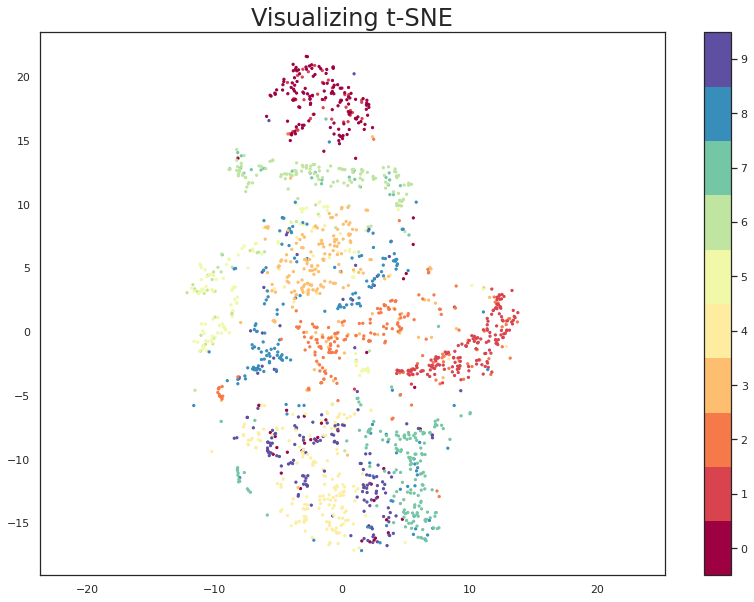

In [ ]:
df = dfTrain.dropna()
y = df.loc[:,'label'].values
x = df.loc[:,'0':].values
standardized_data = StandardScaler().fit_transform(x)
x_subset = x
y_subset = y
tsne = TSNE(random_state = 42, n_components=2,verbose=0, perplexity=40, n_iter=300).fit_transform(x_subset)
plt.scatter(tsne[:, 0], tsne[:, 1], s= 5, c=y_subset, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('Visualizing t-SNE', fontsize=24);

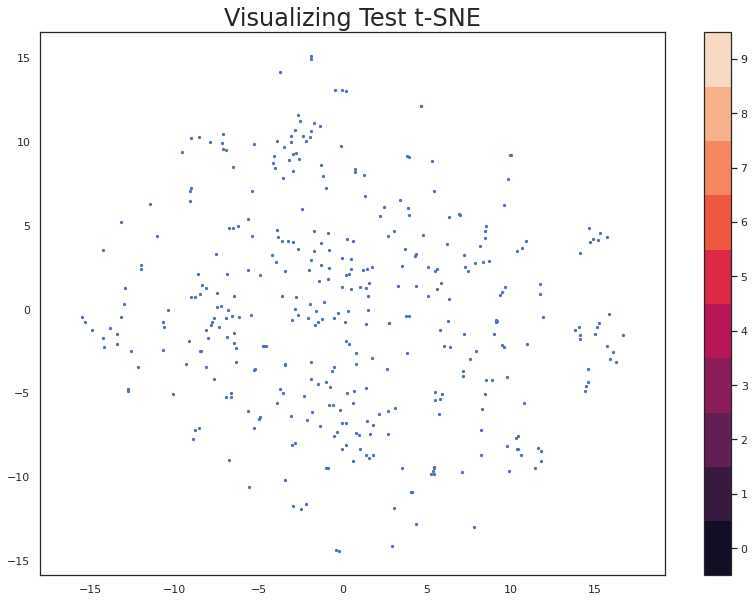

In [ ]:
df = dfTest.dropna()
x = df.loc[:,'0':].values
standardized_data = StandardScaler().fit_transform(x)
x_subset = x
tsne = TSNE(random_state = 42, n_components=2,verbose=0, perplexity=40, n_iter=300).fit_transform(x_subset)
plt.scatter(tsne[:, 0], tsne[:, 1], s= 5, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('Visualizing Test t-SNE', fontsize=24);

In [ ]:
dfTrain.describe()

,id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,label
count,50000.000000,39968.000000,40131.000000,39984.000000,39837.000000,39930.000000,40025.000000,40007.000000,39972.000000,39971.000000,40050.000000,39821.000000,40042.000000,40249.000000,40028.000000,40088.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,24999.500000,0.074371,-0.106527,0.532518,0.076013,-0.259744,0.140226,-0.492462,0.250322,-0.031303,0.218344,-0.876994,0.086256,0.132506,0.040365,0.008916,-0.175794,-0.058523,-0.079170,-0.227921,-0.146382,-0.196960,0.022533,-0.040699,0.293221,-0.064928,0.262877,0.067096,0.472347,0.154409,-0.142589,0.025962,-0.587307,0.394195,-0.865386,-0.088213,-0.206311,-0.215586,-0.313739,-0.154303,...,-0.255581,0.375205,0.017480,-0.270856,-0.133471,0.091205,0.353467,0.359872,-0.028717,-1.365145,0.243015,-0.055864,0.115994,0.406451,-0.650242,0.415990,-0.279505,-0.135137,0.218452,-0.538549,-0.094855,0.168345,0.025495,0.335863,-0.083341,-0.149127,0.078689,-0.013940,-0.169975,0.005079,0.027456,-0.142841,-0.086639,-0.014571,0.215231,0.012312,-0.047588,-0.073314,-0.061595,4.454880
std,14433.901067,100.809515,83.107012,153.929337,105.166746,99.186816,201.641217,191.220771,62.215394,123.233443,72.855446,460.314786,104.420838,66.647016,79.981564,77.325811,232.565777,67.062838,65.374788,90.896629,91.386537,70.024791,96.188199,58.338867,82.239508,143.906529,125.072997,62.878564,103.646270,62.158438,78.751415,71.170833,166.614685,116.920865,429.286298,93.328843,69.698003,180.707844,315.227505,136.523551,...,141.581468,88.984640,114.972055,113.517727,139.724017,128.389483,232.557864,334.969716,127.280775,493.250064,129.362335,96.505684,242.507672,212.793461,283.967557,173.835666,263.130436,57.287325,176.630550,577.067283,69.032291,59.530118,94.079852,308.240713,268.536372,60.531159,131.648821,107.972598,64.288487,307.657454,64.723271,84.129521,61.212474,64.409150,74.974307,66.860073,59.573416,408.247041,75.284365,2.885912
min,0.000000,-490.076177,-396.778458,-649.256037,-457.877851,-463.944929,-918.402275,-775.599122,-273.566117,-476.625762,-325.540460,-1436.722495,-496.270934,-315.298823,-343.064434,-339.582889,-933.213534,-328.953615,-294.429753,-417.642945,-513.887660,-350.877196,-449.984447,-252.377886,-380.806397,-660.649296,-522.930553,-291.459791,-435.363918,-305.975559,-385.414903,-330.786214,-668.224266,-540.528972,-1507.422022,-413.251772,-334.824175,-739.018056,-1097.439092,-597.325167,...,-595.553831,-418.789605,-525.498084,-486.101709,-638.615739,-540.983521,-933.213534,-1054.549697,-531.564981,-1382.344377,-538.371707,-429.291708,-937.928245,-889.593407,-988.512907,-751.207441,-1021.236385,-261.873261,-709.129105,-1081.659699,-319.550049,-304.416265,-439.024232,-1062.115550,-816.397942,-277.718914,-564.846506,-446.785936,-319.245131,-1128.416340,-367.990851,-418.484785,-308.314737,-319.245131,-376.004755,-328.953615,-304.416265,-1312.603299,-339.877738,0.000000
25%,12499.750000,-65.381293,-54.671143,-104.258973,-68.485456,-64.456298,-128.050858,-124.142118,-39.686

In [ ]:
dfTest.describe()

,id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109
count,10000.00000,8027.000000,8028.000000,7974.000000,7982.000000,8034.000000,7970.000000,7999.000000,8008.000000,8072.000000,8015.000000,7968.000000,8006.000000,8071.000000,7986.000000,8016.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,2.511828,1.464541,1.252652,0.483417,0.500734,-0.495866,-0.536675,-0.824864,-3.629792,-1.074650,8.238671,-0.221877,0.021308,-0.766405,1.445117,0.878970,0.292615,0.395849,1.139606,0.731910,0.984802,-0.112666,0.203497,-1.466106,0.324641,-1.314383,-0.335482,-2.361734,-0.772046,0.712944,-0.129809,2.936534,-1.970976,4.326932,0.441065,1.031556,1.077929,1.568693,0.771516,...,0.290017,1.277907,-1.876026,-0.087398,1.354280,0.667356,-0.456026,-1.767336,-1.799359,0.143583,6.825724,-1.215073,0.279318,-0.579972,-2.032253,3.251211,-2.079951,1.397527,0.675684,-1.092258,2.692746,0.474274,-0.841724,-0.127474,-1.679317,0.416707,0.745637,-0.393446,0.069702,0.849876,-0.025395,-0.137280,0.714206,0.433196,0.072857,-1.076157,-0.061558,0.237942,0.366570,0.307975
std,2886.89568,100.519659,84.078556,153.143495,105.391119,100.046245,201.427863,192.251895,62.422032,125.261132,72.747067,455.795684,105.195442,66.710819,80.209716,77.950910,233.051152,66.894107,64.943724,90.340153,92.713835,69.616814,95.824682,58.451530,81.592299,142.900330,125.461931,63.599247,103.093182,60.948515,78.834771,70.635180,168.362473,116.452388,432.690297,93.001002,69.855512,181.342169,310.501877,136.519212,...,57.751256,142.966530,88.321240,114.462167,112.828053,140.166425,128.906952,233.084579,334.743166,127.080990,493.146952,129.167686,96.285121,242.727950,214.639209,285.773589,175.011389,264.511470,57.227673,178.127737,575.620727,69.107066,59.723952,94.412332,305.158593,270.794960,60.883104,131.870726,108.000178,64.265041,308.093225,64.367447,85.056446,60.393964,63.664782,74.612910,67.902172,59.514255,410.182145,75.589858
min,0.00000,-412.065857,-373.274346,-585.443246,-413.820441,-490.405066,-797.873496,-806.945165,-247.764966,-468.292353,-322.400455,-1288.248089,-401.935845,-295.925845,-352.244260,-350.067251,-904.317658,-278.966593,-275.215593,-360.813543,-429.858319,-305.714000,-422.136570,-265.507337,-352.853710,-528.420978,-494.147076,-347.152608,-496.366859,-280.480595,-336.476044,-288.947921,-649.340341,-502.173356,-1325.316787,-376.077956,-310.042024,-624.987499,-937.424019,-574.570017,...,-264.524348,-617.712659,-361.167509,-391.193585,-500.566895,-503.611325,-537.853053,-853.053061,-1108.619454,-557.654766,-1379.232833,-604.583215,-409.489759,-791.439776,-727.277443,-1004.864971,-653.339266,-880.441882,-232.909578,-650.767984,-1072.375813,-318.462598,-283.038404,-434.821385,-1128.416340,-773.906322,-238.012435,-532.661952,-452.682647,-245.518363,-953.130357,-360.475205,-417.729894,-236.827136,-253.663467,-310.891806,-284.081931,-286.121015,-1276.770406,-296.815316
25%,2499.75000,-62.275184,-54.371595,-102.383415,-68.011631,-65.872902,-129.316753,-125.612918,-40.256537,-83.565992,-48.528539,-310.8

In [ ]:
TrainY = dfTrain.loc[:,'label'].values
TrainX = dfTrain.loc[:,'0':'109'].values
TestX = dfTest.loc[:,'0':].values

In [ ]:
# print total missing
print('Missing(TRAIN): %d' % sum(np.isnan(TrainX).flatten()))
print('Missing(TEST): %d' % sum(np.isnan(TestX).flatten()))
# define imputer
imputerTrain = KNNImputer()
imputerTest  = KNNImputer()
# fit on the dataset
imputerTrain.fit(TrainX)
imputerTest.fit(TestX)
# transform the dataset
Xtrain = imputerTrain.transform(TrainX)
Xtest = imputerTest.transform(TestX)
# print total missing
print('Missing(TRAIN): %d' % sum(np.isnan(Xtrain).flatten()))
print('Missing(TEST): %d' % sum(np.isnan(Xtest).flatten()))

np.savetxt("Ytrain.csv", TrainY, delimiter=",")
np.savetxt("Xtrain.csv", Xtrain, delimiter=",")
np.savetxt("Xtest.csv", Xtest, delimiter=",")

Missing(TRAIN): 149897
Missing(TEST): 29844
Missing(TRAIN): 0
Missing(TEST): 0


In [ ]:
import pandas as pd
import numpy as np

dfTrainX = pd.read_csv('/content/drive/MyDrive/SHAREcompetition1dataset/Xtrain.csv')
dfTrainY = pd.read_csv('/content/drive/MyDrive/SHAREcompetition1dataset/Ytrain.csv')
dfTest = pd.read_csv('/content/drive/MyDrive/SHAREcompetition1dataset/Xtest.csv')

firstrowdfTest = dfTest.columns.astype(np.float64).to_list()
firstrowdfTest = np.array(firstrowdfTest)
firstrowdfTrainX = dfTrainX.columns.astype(np.float64).to_list()
firstrowdfTrainX = np.array(firstrowdfTrainX)
firstrowdfTrainY = dfTrainY.columns.astype(np.float64).to_list()
firstrowdfTrainY = np.array(firstrowdfTrainY)

TrainY = dfTrainY.values
TrainX = dfTrainX.values
TestX = dfTest.values

TrainX = np.insert(TrainX, 0, firstrowdfTrainX, axis=0)
TestX = np.insert(TestX, 0, firstrowdfTest, axis=0)
TrainY = np.insert(TrainY, 0, firstrowdfTrainY, axis=0)
TrainY = TrainY.reshape(50000,)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(TrainX)

X_test = scaler.transform(TestX)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


# instantiate the model
knn = KNeighborsClassifier(n_neighbors=10)


# fit the model to the training set
knn.fit(X_train, TrainY)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(knn, X_train, TrainY, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.008  0.0666 0.8442 0.904  0.899  0.9014 0.9004 0.9006 0.9012 0.9024]


In [ ]:
knn_predicted = knn.predict(X_test)
knn_predicted

array([4., 7., 3., ..., 1., 3., 2.])

In [ ]:
numbers = [ int(x) for x in knn_predicted ]
print(numbers)

[4, 7, 3, 4, 9, 5, 5, 5, 1, 2, 7, 8, 6, 5, 4, 1, 7, 0, 7, 1, 3, 1, 7, 1, 1, 9, 4, 0, 3, 9, 3, 6, 3, 4, 5, 6, 7, 6, 8, 5, 1, 6, 1, 5, 3, 6, 1, 6, 1, 6, 2, 1, 3, 9, 7, 6, 9, 0, 2, 3, 6, 3, 0, 9, 9, 0, 8, 9, 2, 3, 6, 3, 6, 1, 2, 1, 2, 2, 7, 9, 4, 3, 5, 8, 1, 0, 6, 1, 7, 9, 9, 1, 7, 4, 4, 6, 6, 9, 2, 4, 6, 1, 9, 3, 4, 5, 2, 1, 5, 9, 3, 2, 0, 8, 8, 1, 0, 8, 6, 7, 9, 4, 7, 4, 5, 2, 6, 2, 3, 3, 7, 4, 6, 3, 6, 5, 6, 4, 8, 6, 5, 7, 3, 7, 9, 0, 0, 1, 3, 2, 6, 4, 6, 1, 0, 5, 9, 4, 6, 1, 8, 1, 3, 5, 9, 4, 1, 1, 1, 2, 2, 4, 3, 4, 8, 3, 5, 6, 9, 0, 6, 4, 7, 4, 8, 7, 2, 9, 4, 9, 3, 0, 0, 3, 0, 2, 9, 8, 6, 2, 7, 0, 1, 1, 8, 7, 0, 1, 3, 1, 8, 6, 6, 5, 9, 5, 2, 7, 6, 3, 0, 8, 6, 6, 8, 6, 6, 7, 7, 3, 3, 7, 3, 2, 9, 7, 1, 3, 9, 4, 6, 6, 7, 2, 6, 9, 1, 2, 3, 6, 0, 7, 1, 7, 1, 2, 7, 5, 8, 9, 3, 1, 4, 0, 8, 0, 5, 3, 1, 3, 7, 4, 3, 2, 8, 0, 4, 3, 3, 8, 3, 0, 4, 9, 9, 2, 7, 3, 3, 9, 8, 8, 3, 0, 2, 4, 1, 1, 6, 4, 3, 6, 1, 9, 1, 9, 1, 5, 1, 8, 0, 2, 1, 0, 2, 0, 9, 6, 0, 0, 3, 7, 3, 7, 8, 3, 9, 6, 1, 0, 5, 8, 6, 

In [ ]:
import pandas as pd

my_df = pd.DataFrame(numbers, columns =['label'])

my_df.to_csv('knnpredicted.csv', index=True, header=True)

In [ ]:
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.7228


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

mlp_gs = MLPClassifier(max_iter=100)
parameter_space = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['relu'],
    'solver': ['sgd'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

clf = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5)
clf.fit(TrainX, TrainY) # X is train samples and y is the corresponding labels
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive', 'solver': 'sgd'}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.147 (+/-0.236) for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'constant', 'solver': 'sgd'}
0.301 (+/-0.320) for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.679 (+/-0.644) for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'solver': 'sgd'}
0.719 (+/-0.681) for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.095 (+/-0.057) for {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'constant', 'solver': 'sgd'}
0.115 (+/-0.127) for {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.669 (+/-0.637) for {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'solver': 'sgd'}
0.728 (+/-0.693) for {'act

In [ ]:
predicted_data = clf.predict(TestX)

In [ ]:
numbers = [ int(x) for x in predicted_data ]
import pandas as pd

my_df = pd.DataFrame(numbers, columns =['label'])

my_df.to_csv('mlppredicted.csv', index=True, header=True)

In [ ]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
# define the model
model = RandomForestClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, TrainX, TrainY, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.754 (0.005)


In [ ]:
model = RandomForestClassifier()
# fit the model on the whole dataset
model.fit(TrainX, TrainY)
yhat = model.predict(TestX)
print('Predicted Class: %d' % yhat[0])

In [ ]:
import joblib
joblib.dump(model, "./random_forest.joblib")

['./random_forest.joblib']

In [ ]:
numbers = [ int(x) for x in yhat ]
import pandas as pd

my_df = pd.DataFrame(numbers, columns =['label'])

my_df.to_csv('rfpredicted.csv', index=True, header=True)

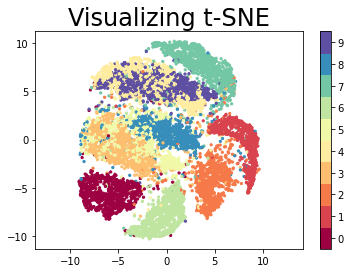

In [ ]:
tsne = TSNE(random_state = 42, n_components=2,verbose=0, perplexity=40, n_iter=300).fit_transform(TestX)
plt.scatter(tsne[:, 0], tsne[:, 1], s= 5, c=numbers, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('Visualizing t-SNE', fontsize=24);

MLP: 0.676060 (0.007544)
LR: 0.686610 (0.004019)
LDA: 0.683910 (0.003782)
KNN: 0.736930 (0.002737)
CART: 0.550420 (0.004013)
NB: 0.689710 (0.004188)
SVM: 0.779700 (0.003193)


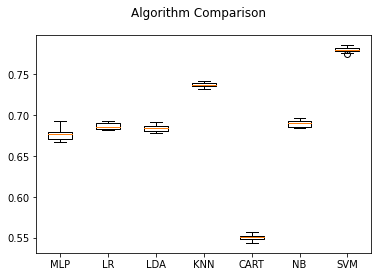

In [ ]:
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# prepare models
models = []
models.append(('MLP', MLPClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
  cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)
  cv_results = model_selection.cross_val_score(model, TrainX, TrainY, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

##PY

seminar04 в отдельном файле

#Seminar05

'''Выход: Файл посчитанных метрик с названием seminar05_metrics.csv, в котором должны быть записаны следующие поля: acc,tpr,fpr,tnr,fnr,prec,rec,f1 (имеющие смысл Accuracy, True Positive Rate, False Positive Rate, True Negative Rate, False Negative Rate, Precision, Recall, F-1 Score) в формате comma separated values с обозначением заголовка (полей) в первой строке.

Пример содержимого файла seminar05_metrics.csv:
acc,tpr,fpr,tnr,fnr,prec,rec,f1
0.5,0.5,0.5,0.1,0.1,0.1,0.1,0.1'''

In [ ]:
def read_y(filename_real, filename_pred):
  y_real = []
  y_pred = []
  with open(filename_real) as f:
    contents = f.read().split('\n')
    y_real = [int(i) for i in contents[:-1]]

  with open(filename_pred) as f:
    contents = f.read().split('\n')
    y_pred = [int(i) for i in contents[:-1]]

  return (y_real,y_pred)


In [ ]:
import numpy as np
import csv

def get_metrics(y_real, y_pred):

    y_real = np.array(y_real)
    y_pred = np.array(y_pred)
    print(y_real, y_pred)

    acc = 0 #Accuracy = (TP + TN)/(TP+FP+TN+FN)
    tpr = 0 #True Positive Rate = TP/(TP+FN)
    fpr = 0 #False Positive Rate = FP/(FP+TN)
    tnr=0 #True Negative Rate = TN/(TN+FP)
    fnr=0 #False Negative Rate = FN/(TP+FN)
    prec=0 #Precision = TP/(TP+FP)
    rec=0 #Recall = TP/(TP+FN)
    f1=0 #F-1 Score = 2*Precision*Recall/(Precision+Recall)

    tp = np.sum((y_pred == 1) & (y_real == 1))
    fp = np.sum((y_pred == 1) & (y_real == -1))

    tn = np.sum((y_pred == -1) & (y_real == -1))
    fn = np.sum((y_pred == -1) & (y_real == 1))

    acc = (tp+tn)/(tp+fp+tn+fn)
    tpr = tp/(tp + fn)
    fpr = fp/(fp + tn)
    tnr = tn/(tn+fp)
    fnr = fn/(fn+tp)
    prec = tp/(tp + fp)
    rec = tpr
    f1 = 2*prec*rec/(prec+rec)

    print('acc','tpr','fpr','tnr','fnr','prec','rec','f1')
    print(acc,tpr,fpr,tnr,fnr,prec,rec,f1)
    with open('seminar05_metrics.csv', mode='w') as f_file:
      m_writer = csv.writer(f_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
      m_writer.writerow(['acc','tpr','fpr','tnr','fnr','prec','rec','f1'])
      m_writer.writerow([acc,tpr,fpr,tnr,fnr,prec,rec,f1])

In [ ]:
y_real, y_pred = read_y('/content/y_true.txt', '/content/y_pred.txt')
get_metrics(y_real, y_pred)

[ 1  1  1  1 -1  1 -1  1  1  1] [ 1  1 -1  1  1  1  1 -1  1  1]
acc tpr fpr tnr fnr prec rec f1
0.6 0.75 1.0 0.0 0.25 0.75 0.75 0.75


##Python

'''Это очередное задание из проекта, посвященного беспилотному вождению. Вам нужно обработать файл с данными из соревнования по предсказанию траекторий Argoverse,
но на этот раз при помощи библиотеки pandas. Легенда такова, что вы получили сырые данные на вход.
В них содержатся ошибки сенсоров, записаны нерелевантные и пустые данные. Задача состоит в том, чтобы привести данные к формату удобному для дальнейшей обработки.

Задание состоит из 5 частей:
1. Обработать пропущенные значения путём удаления строк, содержащих NaN (ошибки в данных с сенсоров привели к тому что координаты вычислить не удалось);
2. Очистить данные от всего что связано с AV и AGENT (Это нерелевантные данные);
3. Удалить траектории, содержащие 10 или меньше точек;
4. Удалить данные от объектов, которые не двигались или двигались на месте (разница в мин/макс координатах по X и по Y не больше 1 метра);
5. Отсортировать данные сначала по ID, а потом по времени внутри ID.

Полученные результаты сохранить в файл result.csv в формате идентичном исходному.
Для сдачи задания необходимо прислать один за другим 2 файла:
-result.csv;
-code.py с исходным кодом, при помощи которого был получен result.csv.

Можно пользоваться только библиотеками pandas и os, больше ничего не разрешено.
Циклы тоже запрещены!'''

In [ ]:
import numpy as np
import pandas as pd
print(pd.__version__)

1.1.5


In [ ]:
df = pd.read_csv('/content/data.csv')
print(df)

        TIMESTAMP                              TRACK_ID  ...           Y  CITY_NAME
0    3.159756e+08  00000000-0000-0000-0000-000000000000  ...  574.649541        PIT
1    3.159756e+08  00000000-0000-0000-0000-000000063593  ...  511.974242        PIT
2    3.159756e+08  00000000-0000-0000-0000-000000064131  ...  584.797334        PIT
3    3.159756e+08  00000000-0000-0000-0000-000000064240  ...  594.538108        PIT
4    3.159756e+08  00000000-0000-0000-0000-000000064242  ...  606.592369        PIT
..            ...                                   ...  ...         ...        ...
349  3.159756e+08  00000000-0000-0000-0000-000000000000  ...  540.399055        PIT
350  3.159756e+08  00000000-0000-0000-0000-000000064296  ...  570.701966        PIT
351  3.159756e+08  00000000-0000-0000-0000-000000063593  ...  467.920002        PIT
352  3.159756e+08  00000000-0000-0000-0000-000000064131  ...  549.918383        PIT
353  3.159756e+08  00000000-0000-0000-0000-000000064290  ...  552.777044    

In [ ]:
df.describe()

,TIMESTAMP,X,Y
count,7.450000e+02,741.000000,741.000000
mean,3.159723e+08,1765.662921,425.792685
std,1.458989e+00,21.990447,22.946362
min,3.159723e+08,1702.509645,350.289271
25%,3.159723e+08,1756.710214,412.245584
50%,3.159723e+08,1768.155305,422.766511
75%,3.159723e+08,1778.035818,435.225621
max,3.159723e+08,1824.112005,503.353511


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TIMESTAMP    354 non-null    float64
 1   TRACK_ID     354 non-null    object 
 2   OBJECT_TYPE  354 non-null    object 
 3   X            354 non-null    float64
 4   Y            354 non-null    float64
 5   CITY_NAME    354 non-null    object 
dtypes: float64(3), object(3)
memory usage: 16.7+ KB


In [ ]:
df = df.dropna() #1
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 741 entries, 0 to 744
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TIMESTAMP    741 non-null    float64
 1   TRACK_ID     741 non-null    object 
 2   OBJECT_TYPE  741 non-null    object 
 3   X            741 non-null    float64
 4   Y            741 non-null    float64
 5   CITY_NAME    741 non-null    object 
dtypes: float64(3), object(3)
memory usage: 40.5+ KB


In [ ]:
df.isna().sum()

TIMESTAMP      0
TRACK_ID       0
OBJECT_TYPE    0
X              0
Y              0
CITY_NAME      0
dtype: int64

In [ ]:
#df = df[(df['OBJECT_TYPE'] != 'AV') & (df['OBJECT_TYPE'] != 'AGENT')] #2
df = df[~df["OBJECT_TYPE"].isin(["AV", "AGENT"])]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 641 entries, 1 to 744
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TIMESTAMP    641 non-null    float64
 1   TRACK_ID     641 non-null    object 
 2   OBJECT_TYPE  641 non-null    object 
 3   X            641 non-null    float64
 4   Y            641 non-null    float64
 5   CITY_NAME    641 non-null    object 
dtypes: float64(3), object(3)
memory usage: 35.1+ KB


In [ ]:
df_count = df.groupby('TRACK_ID').count() #3
df_count

,TIMESTAMP,OBJECT_TYPE,X,Y,CITY_NAME
TRACK_ID,,,,,
00000000-0000-0000-0000-000000000000,50,50,50,50,50
00000000-0000-0000-0000-000000063593,50,50,50,50,50
00000000-0000-0000-0000-000000064131,50,50,50,50,50
00000000-0000-0000-0000-000000064240,35,35,35,35,35
00000000-0000-0000-0000-000000064242,42,42,42,42,42
00000000-0000-0000-0000-000000064245,20,20,20,20,20
00000000-0000-0000-0000-000000064246,25,25,25,25,25
00000000-0000-0000-0000-000000064250,2,2,2,2,2
00000000-0000-0000-0000-000000064253,8,8,8,8,8


In [ ]:
df_tags = df_count[df_count.TIMESTAMP > 10].index
df_tags

Index(['00000000-0000-0000-0000-000000000000',
       '00000000-0000-0000-0000-000000063593',
       '00000000-0000-0000-0000-000000064131',
       '00000000-0000-0000-0000-000000064240',
       '00000000-0000-0000-0000-000000064242',
       '00000000-0000-0000-0000-000000064245',
       '00000000-0000-0000-0000-000000064246',
       '00000000-0000-0000-0000-000000064250',
       '00000000-0000-0000-0000-000000064253',
       '00000000-0000-0000-0000-000000064254',
       '00000000-0000-0000-0000-000000064280',
       '00000000-0000-0000-0000-000000064282',
       '00000000-0000-0000-0000-000000064283',
       '00000000-0000-0000-0000-000000064290',
       '00000000-0000-0000-0000-000000064293',
       '00000000-0000-0000-0000-000000064296'],
      dtype='object', name='TRACK_ID')

In [ ]:
df = df[df['TRACK_ID'].isin(df_tags)]
df

,TIMESTAMP,TRACK_ID,OBJECT_TYPE,X,Y,CITY_NAME
2,3.159723e+08,00000000-0000-0000-0000-000000057429,OTHERS,1787.349267,405.013984,PIT
3,3.159723e+08,00000000-0000-0000-0000-000000057455,OTHERS,1763.774046,429.041952,PIT
4,3.159723e+08,00000000-0000-0000-0000-000000057471,OTHERS,1815.249267,424.806148,PIT
5,3.159723e+08,00000000-0000-0000-0000-000000057487,OTHERS,1769.289562,386.520065,PIT
6,3.159723e+08,00000000-0000-0000-0000-000000057537,OTHERS,1745.832160,443.120176,PIT
...,...,...,...,...,...,...
738,3.159723e+08,00000000-0000-0000-0000-000000057563,OTHERS,1726.392622,455.040132,PIT
739,3.159723e+08,00000000-0000-0000-0000-000000057492,OTHERS,1762.458506,419.759332,PIT
740,3.159723e+08,00000000-0000-0000-0000-000000057571,OTHERS,1719.272148,453.820300,PIT
741,3.159723e+08,00000000-0000-0000-0000-000000057527,OTHERS,1783.392836,409.679944,PIT


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555 entries, 2 to 742
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TIMESTAMP    555 non-null    float64
 1   TRACK_ID     555 non-null    object 
 2   OBJECT_TYPE  555 non-null    object 
 3   X            555 non-null    float64
 4   Y            555 non-null    float64
 5   CITY_NAME    555 non-null    object 
dtypes: float64(3), object(3)
memory usage: 30.4+ KB


In [ ]:
df_min_max = df.groupby('TRACK_ID').agg({'X': ['min', 'max'], 'Y':['min', 'max']}) #4
df_min_max

X  ...           Y
                                              min  ...         max
TRACK_ID                                           ...            
00000000-0000-0000-0000-000000057429  1770.431057  ...  405.013984
00000000-0000-0000-0000-000000057455  1750.659442  ...  444.355884
00000000-0000-0000-0000-000000057471  1815.249267  ...  431.563032
00000000-0000-0000-0000-000000057487  1769.289562  ...  396.822771
00000000-0000-0000-0000-000000057492  1761.952379  ...  420.529970
00000000-0000-0000-0000-000000057494  1776.213934  ...  420.635019
00000000-0000-0000-0000-000000057527  1783.392836  ...  421.007285
00000000-0000-0000-0000-000000057534  1773.018870  ...  423.997703
00000000-0000-0000-0000-000000057536  1767.815751  ...  430.590506
00000000-0000-0000-0000-000000057537  1745.832160  ...  443.120176
00000000-0000-0000-0000-000000057540  1763.599010  ...  435.278397
00000000-0000-0000-0000-000000057545  1722.947521  ...  466.181720
00000000-0000-0000-0000-000000057547  1780.937789  ...  391.429341
00000000-0000-0000-0000-000000057563  1726.392622  ...  468.455276
00000000-0000-0000-0000-000000057564  1729.147073  ...  456.054296
00000000-0000-0000-0000-000000057571  1719.015507  ...  454.070030

[16 rows x 4 columns]

In [ ]:
df_min_max_tags = df_min_max[((df_min_max['X']['max'] - df_min_max['X']['min']) <= 1) & ((df_min_max['Y']['max'] - df_min_max['Y']['min']) <= 1)].index
df_min_max_tags

Index(['00000000-0000-0000-0000-000000057536',
       '00000000-0000-0000-0000-000000057540',
       '00000000-0000-0000-0000-000000057571'],
      dtype='object', name='TRACK_ID')

In [ ]:
df['TRACK_ID'].isin(df_min_max_tags).sum()

109

In [ ]:
df = df[~df['TRACK_ID'].isin(df_min_max_tags)]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 446 entries, 2 to 742
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TIMESTAMP    446 non-null    float64
 1   TRACK_ID     446 non-null    object 
 2   OBJECT_TYPE  446 non-null    object 
 3   X            446 non-null    float64
 4   Y            446 non-null    float64
 5   CITY_NAME    446 non-null    object 
dtypes: float64(3), object(3)
memory usage: 24.4+ KB


In [ ]:
df = df.sort_values(by=['TRACK_ID', 'TIMESTAMP']) #5

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354 entries, 0 to 350
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TIMESTAMP    354 non-null    float64
 1   TRACK_ID     354 non-null    object 
 2   OBJECT_TYPE  354 non-null    object 
 3   X            354 non-null    float64
 4   Y            354 non-null    float64
 5   CITY_NAME    354 non-null    object 
dtypes: float64(3), object(3)
memory usage: 19.4+ KB


In [ ]:
for idx,v in df.iterrows():
  print(idx,v)

2 TIMESTAMP                               3.15972e+08
TRACK_ID       00000000-0000-0000-0000-000000057429
OBJECT_TYPE                                  OTHERS
X                                           1787.35
Y                                           405.014
CITY_NAME                                       PIT
Name: 2, dtype: object
18 TIMESTAMP                               3.15972e+08
TRACK_ID       00000000-0000-0000-0000-000000057429
OBJECT_TYPE                                  OTHERS
X                                           1786.42
Y                                            404.25
CITY_NAME                                       PIT
Name: 18, dtype: object
35 TIMESTAMP                               3.15972e+08
TRACK_ID       00000000-0000-0000-0000-000000057429
OBJECT_TYPE                                  OTHERS
X                                           1785.53
Y                                            403.54
CITY_NAME                                       PIT
Name: 35,

In [ ]:
df.to_csv('result.csv', index=False)

In [ ]:
df1 = pd.read_csv('/content/result.csv')
print(df1)

        TIMESTAMP                              TRACK_ID  ...           Y  CITY_NAME
0    3.159756e+08  00000000-0000-0000-0000-000000000000  ...  574.649541        PIT
1    3.159756e+08  00000000-0000-0000-0000-000000000000  ...  573.976790        PIT
2    3.159756e+08  00000000-0000-0000-0000-000000000000  ...  573.301732        PIT
3    3.159756e+08  00000000-0000-0000-0000-000000000000  ...  572.553818        PIT
4    3.159756e+08  00000000-0000-0000-0000-000000000000  ...  571.947482        PIT
..            ...                                   ...  ...         ...        ...
349  3.159756e+08  00000000-0000-0000-0000-000000064293  ...  611.409039        PIT
350  3.159756e+08  00000000-0000-0000-0000-000000064296  ...  572.082997        PIT
351  3.159756e+08  00000000-0000-0000-0000-000000064296  ...  571.341589        PIT
352  3.159756e+08  00000000-0000-0000-0000-000000064296  ...  570.701966        PIT
353  3.159756e+08  00000000-0000-0000-0000-000000064296  ...  570.701966    

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446 entries, 0 to 445
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TIMESTAMP    446 non-null    float64
 1   TRACK_ID     446 non-null    object 
 2   OBJECT_TYPE  446 non-null    object 
 3   X            446 non-null    float64
 4   Y            446 non-null    float64
 5   CITY_NAME    446 non-null    object 
dtypes: float64(3), object(3)
memory usage: 21.0+ KB


In [ ]:
for idx,v in df1.iterrows():
  print(idx,v)

0 TIMESTAMP                               3.15972e+08
TRACK_ID       00000000-0000-0000-0000-000000057429
OBJECT_TYPE                                  OTHERS
X                                           1787.35
Y                                           405.014
CITY_NAME                                       PIT
Name: 0, dtype: object
1 TIMESTAMP                               3.15972e+08
TRACK_ID       00000000-0000-0000-0000-000000057429
OBJECT_TYPE                                  OTHERS
X                                           1786.42
Y                                            404.25
CITY_NAME                                       PIT
Name: 1, dtype: object
2 TIMESTAMP                               3.15972e+08
TRACK_ID       00000000-0000-0000-0000-000000057429
OBJECT_TYPE                                  OTHERS
X                                           1785.53
Y                                            403.54
CITY_NAME                                       PIT
Name: 2, dty

#Seminar06

##ML

In [ ]:
x1 = [24,0]
x2 = [26,0]
x3 = [25,0]
y1 = 1
y2 = 1
y3 = -1

def K_kernel2(a,b):
  assert(len(a)==len(b))
  scalar_sum = 0
  for i in range(len(a)):
    scalar_sum = scalar_sum + a[i]*b[i]
  return (scalar_sum + 1)**2

In [ ]:
x1x1 = K_kernel2(x1,x1)
x1x2 = 2*y1*y2*K_kernel2(x1,x2)
x1x3 = 2*y1*y3*K_kernel2(x1,x3)
x2x2 = K_kernel2(x2,x2)
x2x3 = 2*y2*y3*K_kernel2(x2,x3)
x3x3 = K_kernel2(x3,x3)
print("x1x1,x2x2,x3x3,x1x2,x1x3,x2x3")
print(x1x1,x2x2,x3x3,x1x2,x1x3,x2x3)

x1x1,x2x2,x3x3,x1x2,x1x3,x2x3
332929 458329 391876 781250 -722402 -847602


In [ ]:
tmp1 = x3x3+x1x1+x1x3
tmp1

3540339

In [ ]:
tmp2 = x3x3+x2x3+x2x2
tmp2

16477659

In [ ]:
this_tmp = x1x2+x1x3+x2x3+2*x3x3
this_tmp

-15274314

In [ ]:
next_tmp = -this_tmp/2
next_tmp

7637157.0

In [ ]:
lambda2 = ((2*next_tmp/tmp1)+2)/(tmp2-next_tmp*next_tmp/tmp1) #lambda2
print("lambda2 = ",lambda2)

lambda2 =  0.002163719168476932


In [ ]:
lambda1 = (2+next_tmp*lambda2)/tmp1
print("lambda1 = ",lambda1)

lambda1 =  0.004668101838148206


In [ ]:
lambda3 = lambda1 + lambda2
print("lambda3 = ",lambda3)

lambda3 =  0.006831821006625138


In [ ]:
w0=lambda1*K_kernel2(x1,x1)+lambda2*K_kernel2(x2,x1)-lambda3*K_kernel2(x3,x1)-1
w0
c0= -w0
c0

2.719008264462218

In [ ]:
c2 = lambda1*x1[0]**2+lambda2*x2[0]**2-lambda3*x3[0]**2
c2

0.001836547291091506

In [ ]:
c1 = lambda1*x1[0]*2+lambda2*x2[0]*2-lambda3*x3[0]*2
c1

-0.1652892561983041

In [ ]:
import numpy as np

In [ ]:
(c1+np.sqrt(c1*c1-24.75))*2

-9.000000000004604

In [ ]:
(c1-np.sqrt(c1*c1-24.75))*2

-10.999999999994373

In [ ]:
import csv

with open('seminar06_svm.csv', mode='w') as f_file:
      m_writer = csv.writer(f_file, delimiter=',')
      m_writer.writerow(['c2','c1','c0'])
      m_writer.writerow([c2,c1,c0])

In [ ]:
def read_y(filename_,):
  with open(filename_) as f:
    contents = f.read()
  return (contents)
read_y('/content/seminar06_svm.csv')

'c2,c1,c0\n0.25,-4.999999999999744,23.75\n'

##Python

Работа в Pylint. Отдельный файл Matrix.py  

#Seminar07

##ML

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer

dfTrain = pd.read_csv('/content/drive/MyDrive/SHAREcompetition2dataset/train.csv')
dfTest = pd.read_csv('/content/drive/MyDrive/SHAREcompetition2dataset/test.csv')

In [ ]:
dfTrain.describe()

,id,f2,f3,f4,f5,f6,f7,f8,f9,f10,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f30,f31,f32,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,...,f252,f253,f254,f255,f256,f257,f258,f259,f260,f261,f262,f263,f264,f265,f266,f267,f268,f269,f270,f271,f272,f273,f274,f275,f276,f277,f278,f279,f280,f281,f282,f283,f284,f285,f286,f287,f288,f289,f290,target
count,24376.000000,24376.000000,19265.000000,24242.000000,16726.000000,16726.000000,1.349100e+04,16726.000000,16726.000000,13534.000000,2.437600e+04,24376.000000,24376.000000,24376.000000,24376.000000,19045.000000,24376.000000,24376.000000,19047.000000,24376.000000,24376.000000,12890.000000,24376.000000,24376.000000,24376.000000,24376.000000,24376.000000,24376.000000,24376.000000,2.437600e+04,24376.000000,24376.000000,24376.000000,24376.000000,24376.000000,24376.000000,24376.000000,24376.000000,24376.000000,24376.000000,...,23575.000000,23575.000000,23575.000000,24376.000000,24376.000000,24376.000000,24376.000000,24376.000000,24376.000000,24376.000000,24376.000000,24376.000000,24376.000000,24376.000000,24376.000000,24376.000000,24376.000000,24232.000000,24376.000000,2.437600e+04,24376.000000,2.437600e+04,24376.000000,24129.000000,24129.000000,24129.000000,24376.000000,24376.000000,24376.000000,24376.000000,24376.000000,24376.000000,24376.000000,24376.000000,24376.000000,24376.000000,24376.000000,24376.000000,24376.000000,2.437600e+04
mean,12188.500000,54.240811,34.492759,7.684061,12.555064,1.834091,3.365373e+03,1.909781,6.229702,2.108911,1.773943e+07,84020.911265,0.219091,0.118681,5132.907737,3265.674403,4.067238,5348.070520,8317.056229,4.707704,0.109821,1191.180450,1.329299,0.139810,6.629841,2.909050,0.291516,4.202043,8.303495,1.465261e+05,67315.476780,79210.946095,11164.717796,5716.655932,5448.118969,53636.698843,27243.874180,26392.916475,19219.494626,5813.941787,...,766.678216,1284.460579,1025.569517,7.310100,27.942731,30.583853,26.819946,13.402527,4.679234,0.709304,6.151419,12.352437,0.200238,3.910075,20.237447,2.323884,22.811137,10.354473,71.520881,1.401806e+06,30.145225,1.173532e+06,266.004472,764.595786,1277.484330,1021.040015,17.840335,66.336396,73.539219,63.592837,32.123031,10.798121,1.774532,15.096899,30.352068,0.443879,8.673490,52.838407,5.993354,7.124755e+06
std,7036.889417,40.939055,57.527014,5.325196,6.765722,1.487298,1.726222e+05,0.846089,22.318067,0.886838,2.081008e+07,57929.863521,0.175453,0.118329,3815.381183,2164.613758,2.988874,3988.433799,4275.718350,3.437485,0.333621,1054.303659,1.496961,0.447238,6.573635,3.309718,1.529370,4.764733,23.725354,2.824695e+05,129238.126363,153282.363548,8285.423134,4274.284966,4019.197590,37506.272377,18956.241445,18649.871300,13206.102217,4081.964247,...,224.029316,353.512382,288.285448,18.350018,72.349861,70.021154,71.331142,41.543892,16.977481,2.787534,15.510283,25.967259,0.449530,13.284567,18.896546,2.276659,11.224252,5.659138,155.833894,2.303944e+06,23.954833,1.004287e+06,516.096962,151.649017,235.177593,193.224987,33.370398,126.315460,126.559357,124.484597,73.664193,28.438960,5.428966,29.221547,47.525878,0.609236,20.653677,46.373546,4.886120,4.838390e+06
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,1.000000,2.081628e+06,2546.000000,0.001879,0.000000,175.000000,0.000000,0.000000,168.000000,1012.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.546000e+03,1208.000000,1341.000000,365.000000,189.000000,177.000000,1633.000000,863.000000,771.000000,548.000000,156.000000,...,300.000000,500.000000,400.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.520000,0.210000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,300.000000,500.000000,400.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+05
25%,6094.750000,38.000000,20.000000,3.000000,9.000000,1.000000,1.967000e+03,1.000000,

In [ ]:
dfTest.describe()

,id,f2,f3,f4,f5,f6,f7,f8,f9,f10,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f30,f31,f32,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,...,f251,f252,f253,f254,f255,f256,f257,f258,f259,f260,f261,f262,f263,f264,f265,f266,f267,f268,f269,f270,f271,f272,f273,f274,f275,f276,f277,f278,f279,f280,f281,f282,f283,f284,f285,f286,f287,f288,f289,f290
count,6095.000000,6095.000000,4823.000000,6062.000000,4173.000000,4173.000000,3375.000000,4173.000000,4173.000000,3378.000000,6.095000e+03,6095.000000,6095.000000,6095.000000,6095.000000,4738.000000,6095.000000,6095.000000,4739.000000,6095.000000,6095.000000,3140.000000,6095.000000,6095.000000,6095.000000,6095.000000,6095.000000,6095.000000,6095.000000,6.095000e+03,6095.000000,6095.000000,6095.000000,6095.000000,6095.000000,6095.000000,6095.000000,6095.000000,6095.000000,6095.000000,...,6095.000000,5905.000000,5905.000000,5905.000000,6095.000000,6095.000000,6095.000000,6095.000000,6095.000000,6095.000000,6095.000000,6095.000000,6095.000000,6095.000000,6095.000000,6095.000000,6095.000000,6095.000000,6061.000000,6095.000000,6.095000e+03,6095.000000,6.095000e+03,6095.000000,6045.000000,6045.000000,6045.000000,6095.000000,6095.000000,6095.000000,6095.000000,6095.000000,6095.000000,6095.000000,6095.000000,6095.000000,6095.000000,6095.000000,6095.000000,6095.000000
mean,3048.000000,54.108121,34.045822,7.617783,12.574647,1.799185,1879.585185,1.909897,7.079080,2.099467,1.732760e+07,84198.459393,0.218245,0.119633,5168.495160,3293.774588,4.056604,5379.062346,8356.780755,4.694340,0.109106,1188.925159,1.287285,0.132240,6.655783,2.845775,0.267596,4.196719,8.053322,1.454264e+05,66777.111567,78649.599836,11235.167022,5752.637080,5482.589336,53792.728630,27292.425923,26500.394094,19170.563741,5802.325185,...,108.538638,762.796157,1278.840047,1020.818224,7.132732,27.139459,29.916161,26.145693,12.990484,4.515669,0.698441,6.007711,12.030189,0.194422,3.741920,20.246760,2.304184,22.603263,10.325464,70.697785,1.398063e+06,30.078425,1.175228e+06,263.624774,767.104950,1281.459133,1024.282023,17.673175,65.632158,73.055291,62.977030,31.799508,10.726825,1.760788,14.840197,29.849385,0.436587,8.550123,52.629368,5.961936
std,1759.619277,22.982734,20.852631,5.299220,6.720449,1.456111,447.877887,0.874443,44.774164,0.852903,1.999322e+07,57640.938315,0.173644,0.120116,3821.776873,2190.407716,3.013629,3994.696286,4345.920910,3.475677,0.332183,1068.240545,1.476207,0.429739,6.565864,3.209996,1.432461,4.649393,22.768695,2.852578e+05,130276.639456,155028.804806,8298.527320,4280.278055,4026.147676,37395.397135,18872.165027,18617.438876,13049.465617,4041.446198,...,282.071154,223.908533,352.443170,287.668879,17.806271,69.696182,67.526200,68.924725,40.219213,16.508246,2.727046,15.021911,25.044491,0.440896,12.798552,18.633233,2.251063,11.144501,5.707419,153.366643,2.299668e+06,23.802431,1.006980e+06,508.296275,155.401794,240.268793,197.635773,32.863006,124.408347,124.598407,122.440475,72.671405,28.173830,5.378415,28.704990,46.631194,0.609416,20.287798,45.971149,4.901912
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.081628e+06,2546.000000,0.001879,0.000000,175.000000,0.000000,0.000000,168.000000,1012.000000,0.000000,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.693000e+03,1264.000000,1430.000000,365.000000,189.000000,177.000000,1633.000000,863.000000,771.000000,548.000000,156.000000,...,0.000000,300.000000,500.000000,400.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.610000,0.600000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,400.000000,750.000000,575.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1524.500000,38.000000,20.000000,3.000000,9.000000,1.000000,1966.000000,1.000000,1.000000,1.000000,7.307411e+06,21819.000000,0.063755,0.019509,1706.000000,1874.000000,1.000000

In [ ]:
dfTrain.select_dtypes(include=['object'])

,f1,f11,f12,f29,f33,f34,f35,f36,f37,f38,f39,f40,f106,f114,f118,f152
0,2014-01-29,Investment,Juzhnoe Butovo,no,no,no,no,no,no,no,no,no,no,no,no,good
1,2014-04-07,OwnerOccupier,Poselenie Filimonkovskoe,no,no,no,no,no,no,no,no,no,no,no,no,no data
2,2012-05-18,Investment,Lomonosovskoe,no,no,no,no,no,no,no,no,no,no,no,no,satisfactory
3,2013-02-08,Investment,Juzhnoe Tushino,no,no,no,no,no,no,no,no,no,no,no,no,poor
4,2014-01-10,Investment,Ochakovo-Matveevskoe,no,yes,no,no,no,no,no,no,no,no,no,no,satisfactory
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24371,2014-12-21,OwnerOccupier,Poselenie Vnukovskoe,no,no,no,no,no,no,no,no,no,no,no,no,no data
24372,2012-05-10,Investment,Juzhnoe Tushino,no,no,no,no,no,no,no,no,no,no,no,no,satisfactory
24373,2013-12-18,OwnerOccupier,Novo-Peredelkino,no,no,no,no,no,no,no,no,no,no,no,no,good
24374,2014-12-08,Investment,Danilovskoe,no,yes,no,no,no,no,no,no,no,no,no,no,excellent


In [ ]:
dfTest.select_dtypes(include=['object'])

,f1,f11,f12,f29,f33,f34,f35,f36,f37,f38,f39,f40,f106,f114,f118,f152
0,2014-03-29,OwnerOccupier,Poselenie Vnukovskoe,no,no,no,no,no,no,no,no,no,no,no,no,no data
1,2013-02-19,OwnerOccupier,Poselenie Vnukovskoe,no,no,no,no,no,no,no,no,no,no,no,no,no data
2,2013-09-18,OwnerOccupier,Tverskoe,yes,no,no,no,yes,yes,no,no,yes,no,no,no,excellent
3,2014-07-04,OwnerOccupier,Strogino,no,no,no,no,no,no,no,no,yes,no,no,no,good
4,2014-09-24,Investment,Prospekt Vernadskogo,no,no,no,no,no,no,no,no,no,no,no,no,satisfactory
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6090,2014-12-16,OwnerOccupier,Poselenie Shherbinka,no,no,no,no,no,no,no,no,no,no,no,no,no data
6091,2014-06-28,Investment,Mar'ina Roshha,no,no,no,no,no,yes,no,no,no,no,no,no,poor
6092,2015-04-02,Investment,Zapadnoe Degunino,no,no,no,no,yes,no,no,no,no,yes,no,no,poor
6093,2014-07-31,Investment,Juzhnoe Butovo,no,no,no,no,no,no,no,no,no,no,no,no,satisfactory


In [ ]:
dfTrain_drop_obj = dfTrain.select_dtypes(exclude=['object'])
dfTest_drop_obj = dfTest.select_dtypes(exclude=['object'])
TrainY_drop_obj = dfTrain_drop_obj.loc[:,'target'].values
TrainX_drop_obj = dfTrain_drop_obj.loc[:,'f2':'f290'].values
TestX_drop_obj = dfTest_drop_obj.loc[:,'f2':].values

# print total missing
print('Missing(TRAIN): %d' % sum(np.isnan(TrainX_drop_obj).flatten()))
print('Missing(TEST): %d' % sum(np.isnan(TestX_drop_obj).flatten()))
# define imputer
imputerTrain = KNNImputer()
imputerTest  = KNNImputer()
# fit on the dataset
imputerTrain.fit(TrainX_drop_obj)
imputerTest.fit(TestX_drop_obj)
# transform the dataset
Xtrain = imputerTrain.transform(TrainX_drop_obj)
Xtest = imputerTest.transform(TestX_drop_obj)
# print total missing
print('Missing(TRAIN): %d' % sum(np.isnan(Xtrain).flatten()))
print('Missing(TEST): %d' % sum(np.isnan(Xtest).flatten()))

np.savetxt("/content/drive/MyDrive/SHAREcompetition2dataset/Ytrain_drop_obj.csv", TrainY_drop_obj, delimiter=",")
np.savetxt("/content/drive/MyDrive/SHAREcompetition2dataset/Xtrain_drop_obj.csv", Xtrain, delimiter=",")
np.savetxt("/content/drive/MyDrive/SHAREcompetition2dataset/Xtest_drop_obj.csv", Xtest, delimiter=",")

Missing(TRAIN): 209261
Missing(TEST): 51765
Missing(TRAIN): 0
Missing(TEST): 0


In [ ]:
def cut_str(mystr):
  for i in range(-1,-15,-1):
    if mystr[i] == 'e':
      return float(mystr)
    if mystr[i] == '.':
      return float(mystr[0:len(mystr)+i])

In [ ]:
import pandas as pd
import numpy as np

dfTrainX = pd.read_csv('/content/drive/MyDrive/SHAREcompetition2dataset/Xtrain_drop_obj.csv')
dfTrainY = pd.read_csv('/content/drive/MyDrive/SHAREcompetition2dataset/Ytrain_drop_obj.csv')
dfTest = pd.read_csv('/content/drive/MyDrive/SHAREcompetition2dataset/Xtest_drop_obj.csv')

firstrowdfTest = []
for el1 in dfTest.columns.to_list():
  firstrowdfTest.append(cut_str(el1))
firstrowdfTest = np.array(firstrowdfTest)
firstrowdfTrainX = []
for el2 in dfTrainX.columns.to_list():
  firstrowdfTrainX.append(cut_str(el2))
firstrowdfTrainX = np.array(firstrowdfTrainX)
firstrowdfTrainY = dfTrainY.columns.astype(np.float64).to_list()
firstrowdfTrainY = np.array(firstrowdfTrainY)

TrainY = dfTrainY.values
TrainX = dfTrainX.values
TestX = dfTest.values

TrainX = np.insert(TrainX, 0, firstrowdfTrainX, axis=0)
TestX = np.insert(TestX, 0, firstrowdfTest, axis=0)
TrainY = np.insert(TrainY, 0, firstrowdfTrainY, axis=0)
TrainY = TrainY.reshape(24376,)

In [ ]:
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor

regr = BaggingRegressor(base_estimator=SVR(),
                        n_estimators=10, random_state=0).fit(TrainX, TrainY)
predicted_data = regr.predict(TestX)

In [ ]:
predicted_data

array([6284498.03704364, 6284497.34497634, 6285808.53623837, ...,
       6285787.99572375, 6284441.15168078, 6285850.53030743])

In [ ]:
import pandas as pd

my_df = pd.DataFrame(predicted_data, columns =['prediction'])

my_df.to_csv('baggingsvrpredicted.csv', index=True, header=True)

In [ ]:
result = pd.read_csv('baggingsvrpredicted1.csv')
result.id += 1
result.to_csv('baggingsvrpredicted2.csv', index=False, header=True)

##Python

Очередное задание с автомобильными траекториями. По полученным данным нужно выявить нарушителей скоростного режима. Сделать это нужно при помощи итераторов/генераторов, без pandas, numpy, math и прочего.
Требуется написать итератор/генератор (или несколько), пройтись по данным, и выявить всех нарушителей.

Генератор принимает путь к файлу и выдаёт все объекты, превышающие допустимую скорость (40 км/ч) непрерывно в течении 1 секунды или дольше.
Для самопроверки нужно передать боту TRACK_ID всех нарушителей, записанные в answer.txt по одному в строку. Далее прислать код в формате code.py (не ноутбук, не переименованный ноутбук, а именно текстовый файл), в котором будет написан итератор, и всё что нужно для его запуска.

Подсказки:
1. Скорость это путь разделенный на время.
2. Координаты в метрах, время в секундах.

In [ ]:
def MyFirstGenerator(filename):
    with open(filename) as f:
        for line in f:
          line = line.strip()
          line = line.split(',')
          yield line

def pure_euclidean_distance(Ax,Ay,Bx,By):
  if not (isinstance(Ax, (int, float)) and isinstance(Ay, (int, float)) and isinstance(Bx, (int, float)) and isinstance(By, (int, float))):
    raise ValueError('Given values are not numeric')
  return ((Bx-Ax)**2+(By-Ay)**2)**(1/2)

In [ ]:
speed_limit = 40 * 5 / 18
res_dict ={}
violators = []
skip_first = True
for tup in MyFirstGenerator("data.csv"):
    if skip_first:
      skip_first = False
      continue
    times.append(tup[0])
    track_id.append(tup[1])
    rows.append(tup)
    if tup[1] in res_dict:
      distance = pure_euclidean_distance(res_dict[tup[1]]['x'],res_dict[tup[1]]['y'],float(tup[3]),float(tup[4]))
      if speed_limit < distance/(((float(tup[0])-res_dict[tup[1]]['time'])**2)**(1/2)):
        res_dict[tup[1]]['during']=res_dict[tup[1]]['during'] + (((float(tup[0])-res_dict[tup[1]]['time'])**2)**(1/2))
      else:
        res_dict[tup[1]]['during']=0.
    else:
      res_dict.setdefault(tup[1], {})['during'] = 0.

    res_dict.setdefault(tup[1], {})['time'] = float(tup[0])
    res_dict.setdefault(tup[1], {})['x'] = float(tup[3])
    res_dict.setdefault(tup[1], {})['y'] = float(tup[4])

    if res_dict[tup[1]]['during'] >= 1.:
      violators.append(tup[1])

set(violators)

{'00000000-0000-0000-0000-000000063593',
 '00000000-0000-0000-0000-000000064242',
 '00000000-0000-0000-0000-000000064290'}

In [ ]:
lines = set(violators)
with open('answer.txt', 'w') as f:
    for line in lines:
        f.write(line)
        f.write('\n')

In [ ]:
times=[]

track_id=[]
rows=[]

In [ ]:
times=set(times)
track_id=set(track_id)

In [ ]:
print(times)
print(track_id)

{'315975559.06806093', '315975562.3695959', '315975560.46975684', '315975559.46764785', '315975560.17121446', '315975560.9659049', '315975561.966134', '315975558.66648406', '315975558.969832', '315975558.36794984', '315975560.87211925', '315975558.46984017', '315975559.66793704', '315975557.8680912', '315975559.77223885', '315975560.5679766', '315975560.6716495', '315975557.5687699', '315975560.3714604', '315975561.0682056', '315975562.06578386', '315975558.5731788', '315975559.87229323', '315975560.2696353', '315975558.26878834', '315975561.47142965', '315975558.0654409', '315975560.07315737', '315975560.76729447', '315975559.268216', '315975562.2727736', '315975562.47261137', '315975559.9682921', '315975557.9648696', '315975561.16992545', '315975558.1702812', '315975562.16682434', '315975558.77021235', '315975561.867114', '315975557.6656505', '315975561.27154225', '315975559.3695172', '315975559.17311287', '315975561.369605', '315975561.56843823', '315975561.6670122', '315975559.5681

In [ ]:
import numpy as np
incident_matrix = np.zeros((len(track_id),len(times)))
for idxi, i in enumerate(track_id):
  for idxj, j in enumerate(times):
    for lst in rows:
      if set([i,j]).issubset(set(lst)):
       incident_matrix[idxi][idxj]=1

print(incident_matrix)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1.]
 [1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0.
  1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
  1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

#Seminar08

Python

Необходимо загрузить CSV файл со сценой (формат такой же, как в предыдущем семинаре) и отобразить траектории на графике. Требования к визуализации:

1. Координаты X должны быть отложены по горизонтальной оси.
2. Координаты Y должны быть отложены по вертикальной оси.
3. Все траектории должны быть показаны на одном графике
4. Все траектории должны быть различимы (по цвету, типу линии, маркеру - как вам удобно).
5. График должен иметь заголовок "Визуализация дорожной сцены".
6. На графике должны быть обозначены названия осей.
7. На графике должна быть отображена сетка.
8. Легенда должна отображать соответствие траекторий на графике и их идентификаторов (TRACK_ID) из файла и типа объекта (OBJ_TYPE).
9. Для упрощения идентификатор вида 00000000-0000-0000-0000-0000000ABCDF можно заменить на 0000000ABCDF (OBJ_TYPE).

Код создания файла необходимо сохранить под именем scene_plot.py (не ноутбук!).
Полученный файл необходимо сохранить в формате PNG под именем scene.png.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import sys
import os
import numpy as np
import random
import pandas as pd
import time

In [ ]:
df = pd.read_csv("data.csv")
df = df.sort_values(by=['TRACK_ID', 'TIMESTAMP'])

In [ ]:
df.head()

,TIMESTAMP,TRACK_ID,OBJECT_TYPE,X,Y,CITY_NAME
0,3.159756e+08,00000000-0000-0000-0000-000000000000,AV,1985.486845,574.649541,PIT
14,3.159756e+08,00000000-0000-0000-0000-000000000000,AV,1984.681012,573.976790,PIT
27,3.159756e+08,00000000-0000-0000-0000-000000000000,AV,1983.868862,573.301732,PIT
37,3.159756e+08,00000000-0000-0000-0000-000000000000,AV,1982.974401,572.553818,PIT
47,3.159756e+08,00000000-0000-0000-0000-000000000000,AV,1982.239064,571.947482,PIT


In [ ]:
df['TRACK_ID'] = df['TRACK_ID'].str[-12:]
df["TRACK_ID"] = df["TRACK_ID"] +' (' +df["OBJECT_TYPE"]+')'
df.head()

,TIMESTAMP,TRACK_ID,OBJECT_TYPE,X,Y,CITY_NAME
0,3.159756e+08,000000000000 (AV),AV,1985.486845,574.649541,PIT
14,3.159756e+08,000000000000 (AV),AV,1984.681012,573.976790,PIT
27,3.159756e+08,000000000000 (AV),AV,1983.868862,573.301732,PIT
37,3.159756e+08,000000000000 (AV),AV,1982.974401,572.553818,PIT
47,3.159756e+08,000000000000 (AV),AV,1982.239064,571.947482,PIT


In [ ]:
df_count = df.groupby('TRACK_ID').count()
print(df_count)
df_tags = df_count.index
print(df_tags.values)

                       TIMESTAMP  OBJECT_TYPE   X   Y  CITY_NAME
TRACK_ID                                                        
000000000000 (AV)             50           50  50  50         50
000000063593 (OTHERS)         50           50  50  50         50
000000064131 (AGENT)          50           50  50  50         50
000000064240 (OTHERS)         35           35  35  35         35
000000064242 (OTHERS)         42           42  42  42         42
000000064245 (OTHERS)         20           20  20  20         20
000000064246 (OTHERS)         25           25  25  25         25
000000064250 (OTHERS)          2            2   2   2          2
000000064253 (OTHERS)          8            8   8   8          8
000000064254 (OTHERS)          2            2   2   2          2
000000064280 (OTHERS)          1            1   1   1          1
000000064282 (OTHERS)          2            2   2   2          2
000000064283 (OTHERS)          8            8   8   8          8
000000064290 (OTHERS)    

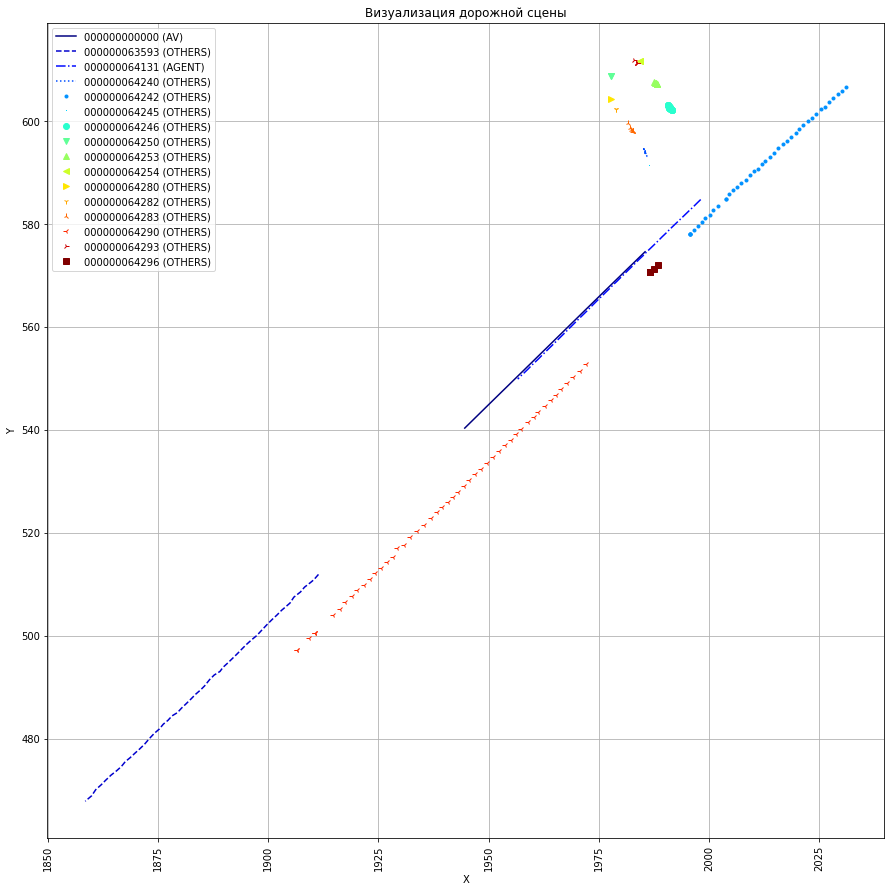

In [ ]:
plt.figure(figsize=(17, 17))

linestyles=['-','--','-.',':','.',',','o','v','^','<','>','1','2','3','4','s','p','*','h','H','+','x','D','d','|','_']

n = len(df_tags.values)
colors = plt.cm.jet(np.linspace(0,1,n))

for idx, i in enumerate(df_tags.values):
  data_x = df[df['TRACK_ID']==i][['X']].values
  data_y = df[df['TRACK_ID']==i][['Y']].values
  plt.plot(data_x, data_y, linestyles[idx], label=i.format(linestyles[idx]), color = colors[idx])

plt.grid() # Отобразим сетку
plt.xlabel("X") # Название оси X
plt.xticks(rotation=90) # Поворот значений по оси X
plt.ylabel("Y") # Название оси Y
plt.title("Визуализация дорожной сцены") # Название графика
plt.legend() # Отобразить легенду
plt.savefig("scene.png") # Любой график можно сохранить в файл
plt.show()